# Lending Club Case Study

Loan Data set is provided for the period 2007 to 2011

## Problem Statement:

Identification of risky loan applicants using EDA is the aim of this case study. <br>
It helps such loans can be reduced thereby cutting down the amount of credit loss. 

## Objective:
- Identify the driving factors behind the "loan default". 
- Based on the analyis over the driver variables, need to segregate the default loan applicants using EDA.

### Read the loan data set csv file as input for this case study.


In [137]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

#Looking for the null and n/a missing values in all the columns.
loan_data = pd.read_csv("loan.csv", header=0, low_memory=False)
loan_data.shape

(39717, 111)

### The Columns which are consider as invalid are not required to participate in the analysis.
 1. #### The columns having only empty rows needs to be removed.

In [138]:
#loan_data = pd.read_csv("loan.csv", header=0, usecols=lambda x: x not in skip_cols, low_memory=False)

# Total number of columns having empty rows in the loan dataset.
loan_data_empty_columns = loan_data.isnull().sum()
loan_data_empty_columns_all_rows = loan_data_empty_columns[loan_data_empty_columns == loan_data.shape[0]]
loan_data_empty_columns_all_rows.shape[0]

54

In [139]:
drop_columns = loan_data_empty_columns_all_rows.index.copy()
drop_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [140]:
# Drop the empty row columns from the loan dataset.
loan_data.drop((drop_columns), axis=1, inplace=True)
loan_data.shape

(39717, 57)

2. #### The columns having same value in all the rows needs to be removed.

In [141]:
loan_data_unique_columns = loan_data.nunique()
loan_data_single_value_columns = loan_data_unique_columns[loan_data_unique_columns <= 1]
loan_data_single_value_columns

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [142]:
# Drop the columns which are having same value in all the rows from the loan dataset.
drop_columns = loan_data_single_value_columns.index.copy()
loan_data.drop((drop_columns), axis=1, inplace=True)
loan_data.shape

(39717, 48)

3. #### The columns having unique values in each rows are needs to be removed.

In [143]:
# The unique values in all the rows for a particular column will not help in analysis.

loan_data_empty_columns = loan_data.isnull().sum()
loan_data_unique_columns = loan_data.nunique()

# The unique columns can be identified by the total no of rows in an column is matched with the sum of (total no of null/na rows + total no of unique rows) in it.
loan_data_unique_columns = loan_data_unique_columns[(loan_data.shape[0]==(loan_data_unique_columns + loan_data_empty_columns))]
loan_data_unique_columns

id           39717
member_id    39717
url          39717
dtype: int64

In [144]:
# Here we are keeping 'id' column alone as it can be used as identification of each row.
drop_columns = loan_data_unique_columns.index.copy()
drop_columns = drop_columns.drop('id')
loan_data.drop((drop_columns), axis=1, inplace=True)
loan_data.shape

(39717, 46)

4. #### The columns having missing/empty values more than 50% can be dropped.

In [145]:
# Drop the entire column if more than 50% of the data's are not presented.

drop_columns = ((loan_data.isna().sum()/loan_data.shape[0])*100).astype(int).reset_index()
drop_columns = drop_columns[drop_columns.iloc[:,1]>50]
drop_columns

,index,0
25,mths_since_last_delinq,64
26,mths_since_last_record,92
43,next_pymnt_d,97


In [146]:
drop_columns = drop_columns['index'].to_list()
loan_data.drop(drop_columns, axis=1, inplace=True)
loan_data.shape

(39717, 43)

5. #### Drop the columns which are irrelavant for the analysis in the dataset.

In [147]:
pd.set_option("display.max_columns" , None)
loan_data.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN
39716,87023,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,7,0,4175,51.50%,8,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,Jun-10,NaN


In [148]:
# The columns which are irrelavant will not help in our analysis and should be dropped. 

# Based on review over the loan data set, we identified below columns are irrelevant for this analysis.
#    Columns: 
# 1. emp_title
# 2. title
# 3. desc 

loan_data.drop(['emp_title','title','desc'],axis=1, inplace=True)
loan_data.shape

(39717, 40)

### Standardize the values and convert it to the appropirate data type for the applicable columns.

#### Looking for the Columns whose Dtype is object.

In [149]:
loan_data.select_dtypes(include=['object']).head()


,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,60 months,15.27%,C,C4,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,36 months,15.96%,C,C5,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,Nov-01,98.50%,Jun-14,May-16
3,36 months,13.49%,C,C1,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,917xx,CA,Feb-96,21%,Jan-15,Apr-16
4,60 months,12.69%,B,B5,1 year,RENT,Source Verified,Dec-11,Current,other,972xx,OR,Jan-96,53.90%,May-16,May-16


#### The data manipulation and datatype conversions are performed for the applicable columns.

In [150]:
# The below 9 columns are identified for data type conversion which helps to perform data analysis better.
# term, zip_code, issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d, emp_length, int_rate, revol_util.

# Convert the term and zip_code columns to int32 data type.
loan_data["term"] = loan_data.term.str.strip()
loan_data["term"] = loan_data.term.str[:2].astype('int32')
loan_data["zip_code"] = loan_data.zip_code.str.strip()
loan_data["zip_code"] = loan_data.zip_code.str[:3].astype('int32')

# The datetime64 conversion for the below date value columns.
loan_data["issue_d"] = pd.to_datetime(loan_data["issue_d"],format='%b-%y')
loan_data["earliest_cr_line"] = pd.to_datetime(loan_data["earliest_cr_line"],format='%b-%y')
loan_data["last_pymnt_d"] = pd.to_datetime(loan_data["last_pymnt_d"],format='%b-%y')
loan_data["last_credit_pull_d"] = pd.to_datetime(loan_data["last_credit_pull_d"],format='%b-%y')

#The data manipulation and datatype conversion done for emp_length column.
loan_data["emp_length"] = loan_data["emp_length"].apply(lambda x: "0" if '<' in str(x) else x)
loan_data["emp_length"]=loan_data.emp_length.str.extract('(\d+)')
loan_data.emp_length.fillna('-1', inplace=True)
loan_data["emp_length"]=pd.to_numeric(loan_data.emp_length).astype('int32')

# removing % from the columns and convert the data type to float64 as per the data set formats.
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')
loan_data["int_rate"] = loan_data.int_rate.astype('float64')
loan_data["revol_util"] = loan_data.revol_util.astype('float64')

loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       39717 non-null  int64         
 1   loan_amnt                39717 non-null  int64         
 2   funded_amnt              39717 non-null  int64         
 3   funded_amnt_inv          39717 non-null  float64       
 4   term                     39717 non-null  int32         
 5   int_rate                 39717 non-null  float64       
 6   installment              39717 non-null  float64       
 7   grade                    39717 non-null  object        
 8   sub_grade                39717 non-null  object        
 9   emp_length               39717 non-null  int32         
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

`Common function has been added.`

In [151]:
# This convertRangeToTextLabel method extract the adjacent elements in the list as strings separated with given delimiter.
# return the list of strings.
def convertRangeToTextLabel(listValue, delimiter):
    retList = []
    currentIndex= 0
    nextIndex = 0
    if(type(listValue) == list):
        listSize = len(listValue)
        for idx, ele in enumerate(listValue):
                if(idx>(listSize-2)):
                    return retList
                else:
                    retList.append(str(listValue[idx])+delimiter+str(listValue[idx+1]))
    else:
        return listValue
    return retList

### Derived Columns
#### Creating additional columns after splitting the date feilds.

In [152]:
#handling issue_d col
loan_data['issue_d_year']=loan_data.issue_d.dt.year
loan_data['issue_d_month']=loan_data.issue_d.dt.strftime('%b')

#handling earliest_cr_line col
loan_data['earliest_cr_line_year']=loan_data.earliest_cr_line.dt.year
loan_data['earliest_cr_line_month']=loan_data.earliest_cr_line.dt.strftime('%b')

#handling last_pymnt_d col
loan_data['last_pymnt_d_year']=loan_data.last_pymnt_d.dt.year.astype('Int32')
loan_data['last_pymnt_d_month']=loan_data.last_pymnt_d.dt.strftime('%b')

#handling last_credit_pull_d col
loan_data['last_credit_pull_d_year']=loan_data.last_credit_pull_d.dt.year.astype('Int32')
loan_data['last_credit_pull_d_month']=loan_data.last_credit_pull_d.dt.strftime('%b')

# Validating the created columns.
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,Dec,1985,Jan,2015,Jan,2016,May
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,Dec,1999,Apr,2013,Apr,2013,Sep
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,Dec,2001,Nov,2014,Jun,2016,May
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,Dec,1996,Feb,2015,Jan,2016,Apr
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,972,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,Dec,1996,Jan,2016,May,2016,May


In [153]:
# creating annual income categories for bracket analysis and plotting in BiVariate Analysis. 
# This column requirement was realized during the bivariate analysis

loan_annual_inc_split_range = np.linspace(0, 1000000, 6, dtype=int).tolist()
loan_data['annual_inc_catgry'] = pd.cut(loan_data['annual_inc'],loan_annual_inc_split_range, labels=convertRangeToTextLabel(loan_annual_inc_split_range,"-"))

# Validating the created columns.
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,annual_inc_catgry
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,Dec,1985,Jan,2015,Jan,2016,May,0-200000
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,Dec,1999,Apr,2013,Apr,2013,Sep,0-200000
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,Dec,2001,Nov,2014,Jun,2016,May,0-200000
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,Dec,1996,Feb,2015,Jan,2016,Apr,0-200000
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,972,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,2011,Dec,1996,Jan,2016,May,2016,May,0-200000


### Perform sanity checks to find the missing values in percentage for all the columns in the loan dataset.

In [154]:
# Perform sanity checks to find the missing values percentage in the dataset.

missing_values_columns = ((loan_data.isna().sum()/loan_data.shape[0])*100).astype(int).reset_index()
missing_values_columns[missing_values_columns.iloc[:,1]>0]


,index,0
39,pub_rec_bankruptcies,1


### Drop the 'Current' category records from the loan dataset.

`The idea is to apply the EDA on the 'Fully Paid' and 'Charged Off' loan dataset to find out the driving factors behind the "loan default".`

In [155]:
loanCurrentCategoryData = loan_data[loan_data['loan_status']=='Current'].copy()
loanCurrentCategoryData.shape

(1140, 49)

In [156]:
loan_data.drop(loanCurrentCategoryData.index, axis=0,inplace=True)
loan_data.shape

(38577, 49)

In [157]:
loan_data.reset_index(drop=True, inplace = True)
pd.set_option("display.max_rows" , None)
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,annual_inc_catgry
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,2011,Dec,1985,Jan,2015,Jan,2016,May,0-200000
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,2011,Dec,1999,Apr,2013,Apr,2013,Sep,0-200000
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,2011,Dec,2001,Nov,2014,Jun,2016,May,0-200000
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2011,Dec,1996,Feb,2015,Jan,2016,Apr,0-200000
4,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852,AZ,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,2011,Dec,2004,Nov,2015,Jan,2016,Jan,0-200000


#### Created separate dataframe reference for the Fully Paid and Charged-Off category to perform better analysis on the loan dataset.

In [158]:
# Created separate reference variable for Charged-Off category of loan data set.
loan_data_charged_off_records = loan_data[loan_data['loan_status']=='Charged Off']
loan_data_charged_off_records = loan_data_charged_off_records.reset_index(drop=True)
loan_data_charged_off_records.shape

(5627, 49)

In [159]:
# Created separate reference variable for Fully-Paid category of loan data set.
loan_data_fully_paid_records = loan_data[loan_data['loan_status']=='Fully Paid']
loan_data_fully_paid_records = loan_data_fully_paid_records.reset_index(drop=True)
loan_data_fully_paid_records.shape

(32950, 49)

## Univariate and Segmented Univariate Analysis

`Common functions created to plot a graph.`

In [160]:
# Common function needed to plot a graph.
import seaborn as sns

def plotSettings(fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize):
    if(titleSize>0):
        fig.suptitle(title,fontsize=titleSize, fontweight="bold")
    else:
        fig.suptitle(title, fontweight="bold")
    
    if(xlabelSize>0):
        fig.supxlabel(xlabel, fontsize=xlabelSize, fontweight="bold")
    else:
        fig.supxlabel(xlabel, fontweight="bold")
    if(ylabelSize>0):
        fig.supylabel(ylabel, fontsize=ylabelSize, fontweight="bold")
    else:
        fig.supylabel(ylabel, fontweight="bold")
    
    axes[0].set(xlabel='Fully Paid Category', ylabel='')
    axes[1].set(xlabel='Charged Off Category', ylabel='')
    fig.tight_layout()
    plt.show()


def plot_box(column_name, fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize, fully_paid_df=loan_data_fully_paid_records, charge_off_df=loan_data_charged_off_records):
    sns.boxplot(data=fully_paid_df[column_name], ax=axes[0])
    sns.boxplot(data=charge_off_df[column_name], ax=axes[1], color="grey")
    plotSettings(fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize)
    
def plot_hist(column_name, binValue, fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize, fully_paid_df=loan_data_fully_paid_records, charge_off_df=loan_data_charged_off_records):
    if(binValue>0):
        sns.histplot(data=fully_paid_df[column_name], ax=axes[0], bins=binValue)
        sns.histplot(data=charge_off_df[column_name], ax=axes[1], color="grey", bins=binValue)
    else:
        sns.histplot(data=fully_paid_df[column_name], ax=axes[0])
        sns.histplot(data=charge_off_df[column_name], ax=axes[1], color="grey")
    plotSettings(fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize)
    
def plot_count(column_name, fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize, fully_paid_df=loan_data_fully_paid_records, charge_off_df=loan_data_charged_off_records):
    sns.countplot(x=column_name,data=fully_paid_df, ax=axes[0])
    sns.countplot(x=column_name,data=charge_off_df, ax=axes[1])
    plotSettings(fig, axes, title, titleSize, xlabel, xlabelSize, ylabel, ylabelSize)
    

#### `Column - `**`Home Ownership`**

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

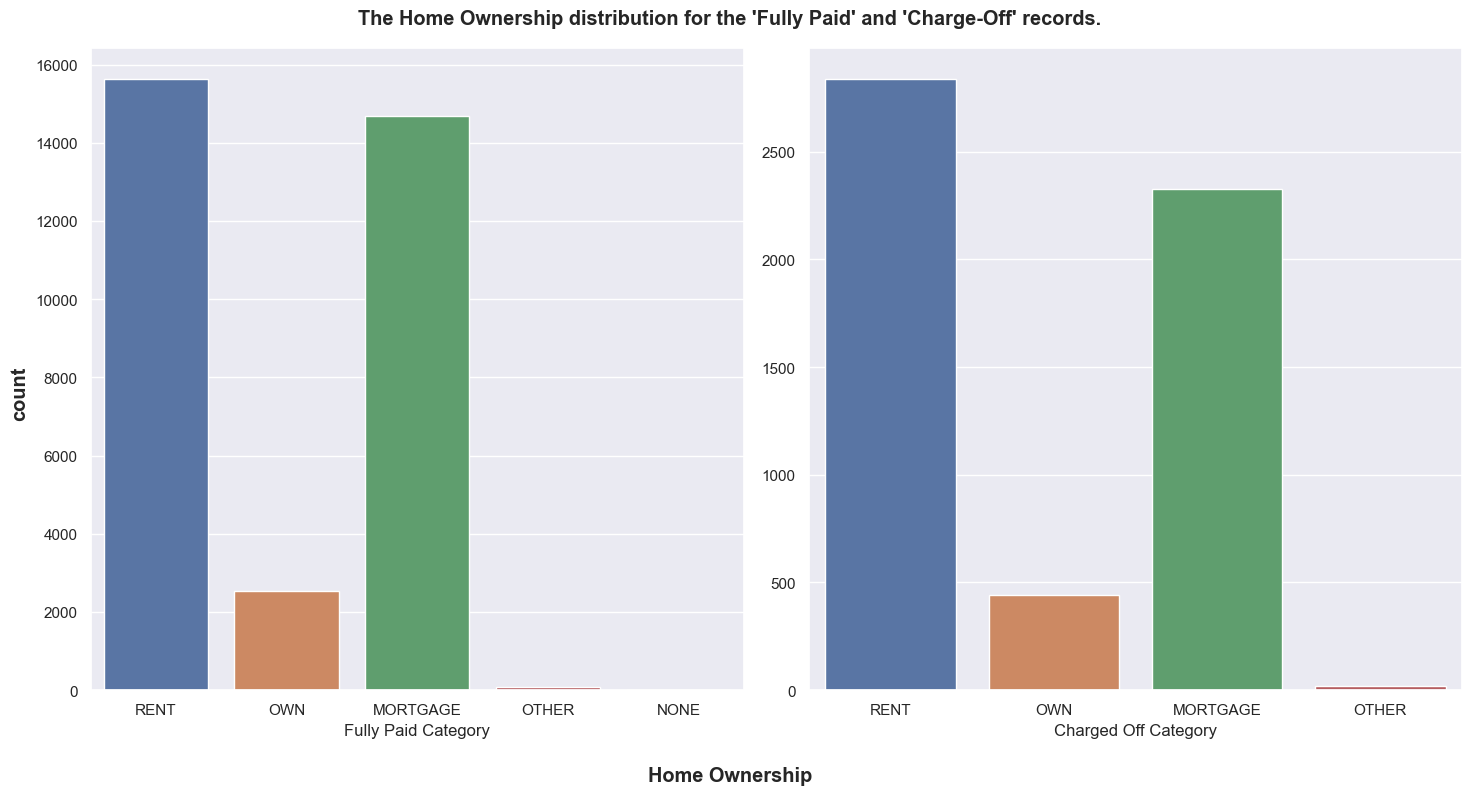

In [161]:
# 
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_count("home_ownership", fig, axes, "The Home Ownership distribution for the 'Fully Paid' and 'Charge-Off' records.",
           0, "Home Ownership", 0, "count", 0)

#### Observations:
1. Majority of the loans are taken by the peoples whose home ownership is either Rent (or) MORTGAGE.
2. Very few poeple taken loans who have own house.
3. `Home ownership is not a great discriminator since data distribution is similar for both categories.`
----------------------------------------------------------------

#### `Column - `**`Purpose`**

A category provided by the borrower for the loan request. 

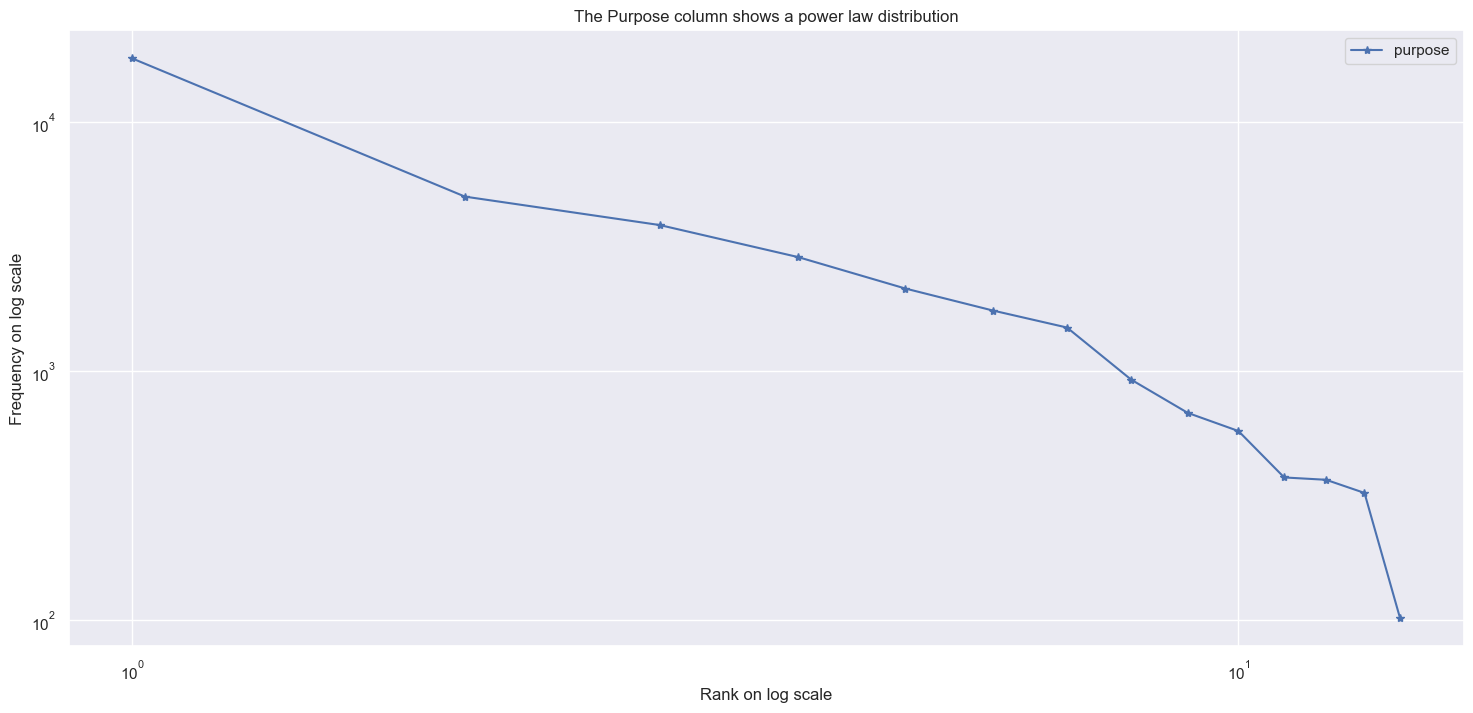

In [162]:
purpose_values = loan_data['purpose'].value_counts().astype(int).reset_index()
purpose_values = purpose_values.rename(columns={'purpose': 'counts', 'index':'purpose'})
purpose_values['Rank'] = purpose_values.index + 1

plt.plot(purpose_values['Rank'],purpose_values['counts'], marker="*")
plt.title("The Purpose column shows a power law distribution") 
plt.xlabel("Rank on log scale")
plt.ylabel("Frequency on log scale")
plt.legend(purpose_values)
plt.yscale('log')
plt.xscale('log')

plt.show()


#### Observations:
1. This follows almost straight line distribution.
2. `Purpose variable is not a great discriminator.`
----------------------------------------------

#### `Column - `**`Interest Rate`**

Interest Rate on the loan.

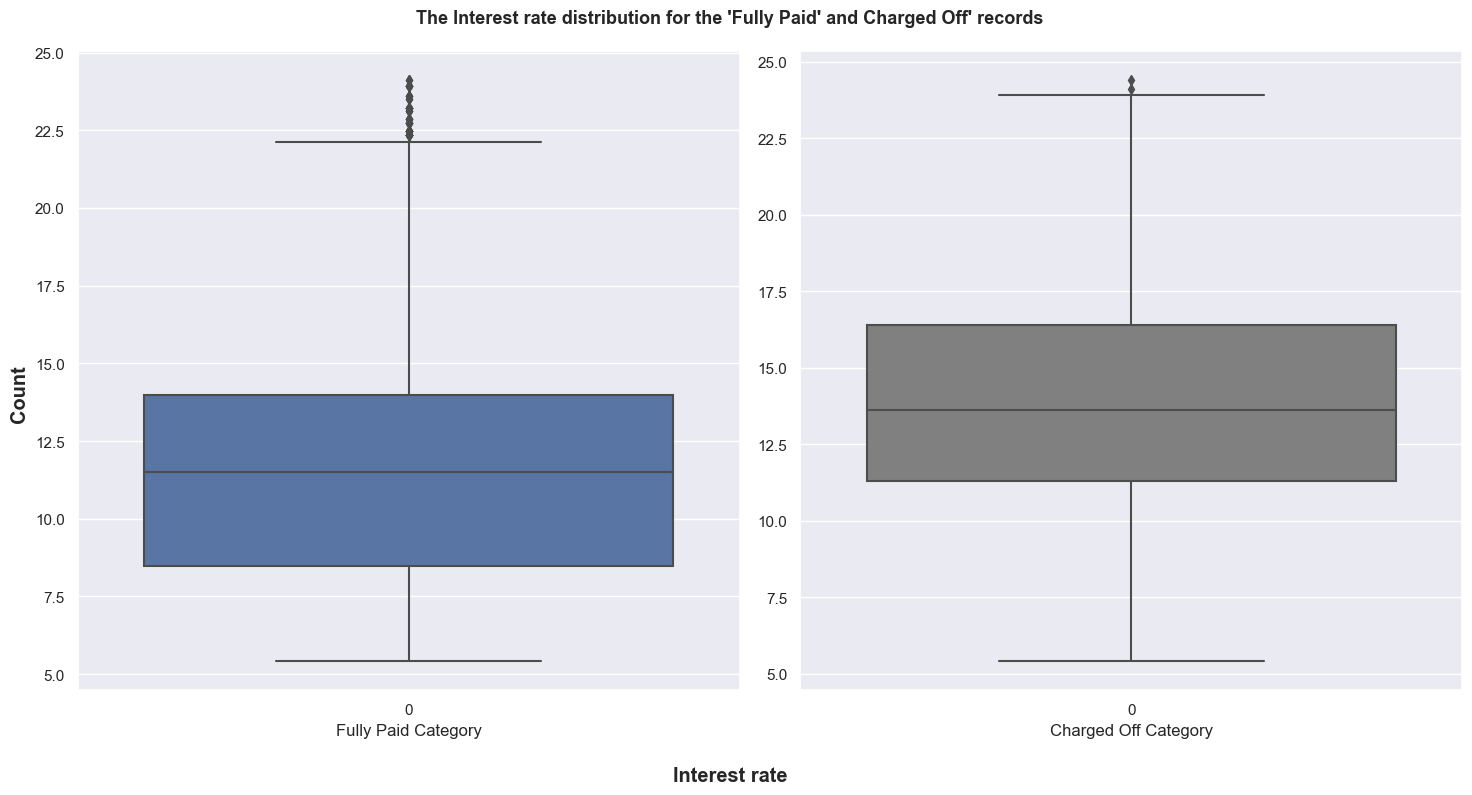

In [163]:
# Box plot for the interest rate distribution.
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_box("int_rate", fig, axes, "The Interest rate distribution for the 'Fully Paid' and Charged Off' records", 13, 
         "Interest rate", 0, "Count", 0)


#### Observations:
1. The average interest rates for the `Fully Paid` records are in the `range of 8 to 14.`
2. The average interest rates for the `Charged Off` records are in the `range of 11 to 17.`
3. `The Interest Rate consider as a discriminator variable.`
-----------------

#### `Column - `**`DTI`**

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

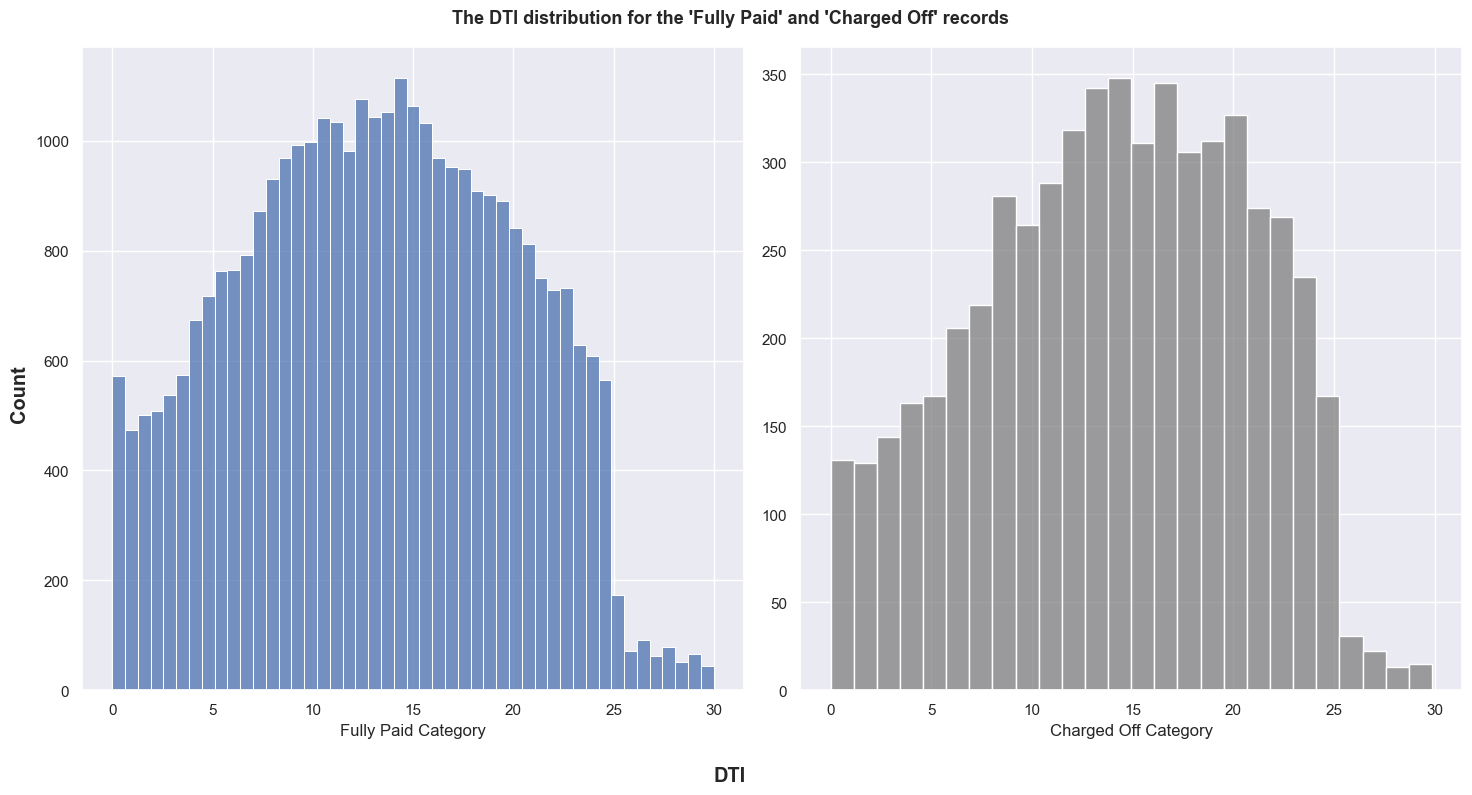

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_hist("dti", 0, fig, axes, "The DTI distribution for the 'Fully Paid' and 'Charged Off' records", 13, "DTI", 0, "Count", 0)

`Need to check the percentage of records exist for the DTI value greater than (or) equal to 25.`

In [165]:
percent_dti_25_and_above = (loan_data[loan_data['dti']>=25].shape[0]/loan_data.shape[0])*100
percent_dti_25_and_above

1.620136350675273

#### Observations:
1. The average DTI value is between the range 5 to 25 with both categories.
2. Less than 2% of the people have more than 25% of DTI value.
3. `Considering DTI values alone is NOT seems to be a discriminator variable.`
-----------------

#### `Column - `**`ZIP CODE`**
The first 3 numbers of the zip code provided by the borrower in the loan application.

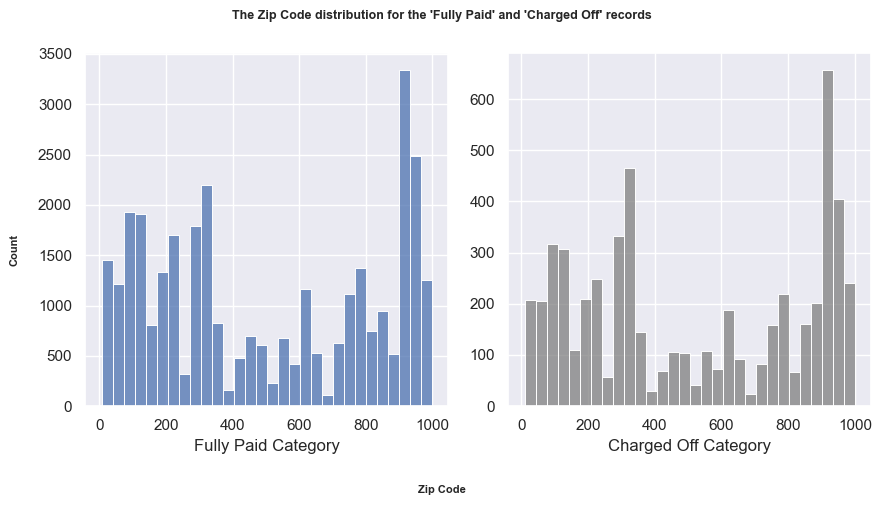

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
plot_hist("zip_code", 30, fig, axes, "The Zip Code distribution for the 'Fully Paid' and 'Charged Off' records", 9, "Zip Code",
          8, "Count", 8)


#### Observations:
1. The ZIP Code value is almost similar with both categories 'Fully Paid' and 'Charged Off'.
2. `The Zip Code is not a great discriminator.`
--------------

#### `Column - `**`Annual Income`**
The self-reported annual income provided by the borrower during registration.

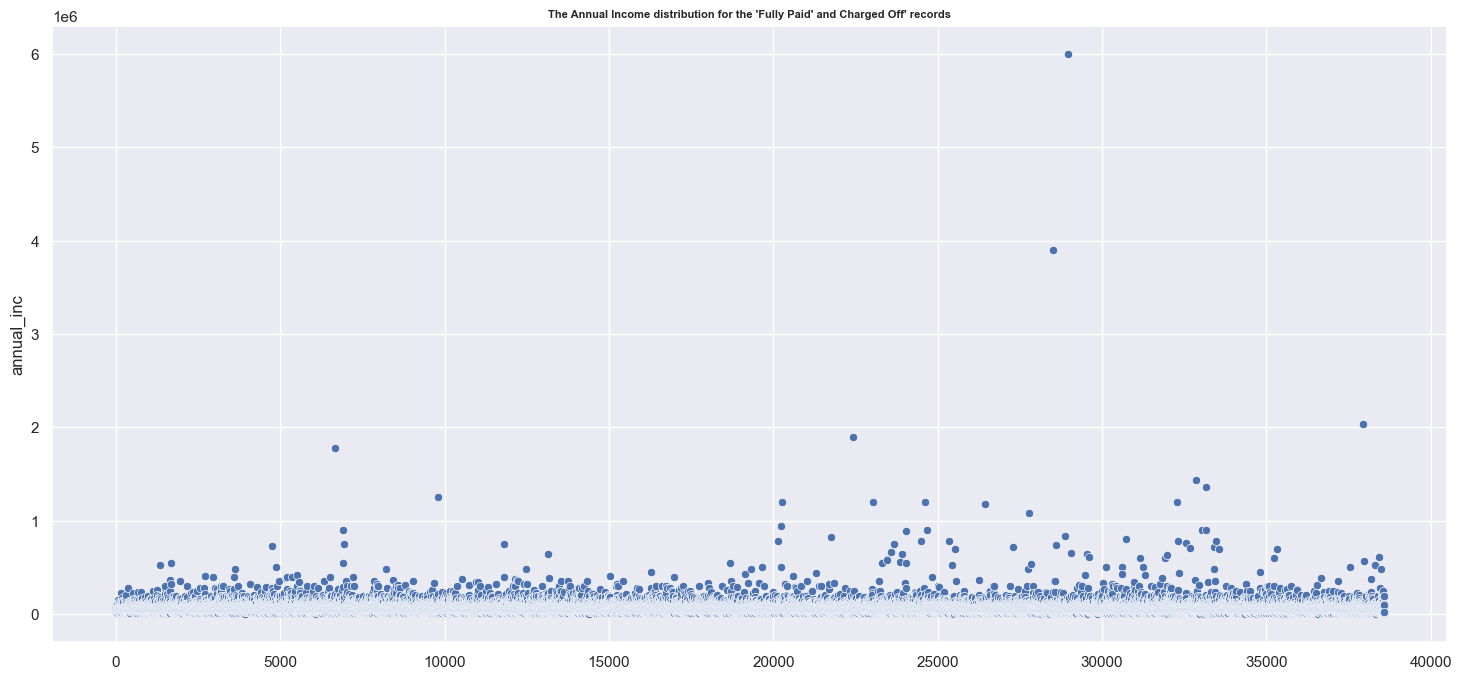

In [167]:
sns.scatterplot(data=loan_data.annual_inc)
plt.title("The Annual Income distribution for the 'Fully Paid' and Charged Off' records",fontsize=8, fontweight="bold") 
plt.show()

**`This is a clear indication of outliers presented in the annual income values.`**

In [168]:
# As the outliers seems to be exist around 90000, let's find out the percentage of the annual_inc which are greater than 90000.

percentage_annual_inc_greater90k = (loan_data[loan_data.annual_inc >= 90000]["annual_inc"].shape[0]/loan_data.shape[0])*100
percentage_annual_inc_greater90k

20.823288487959147

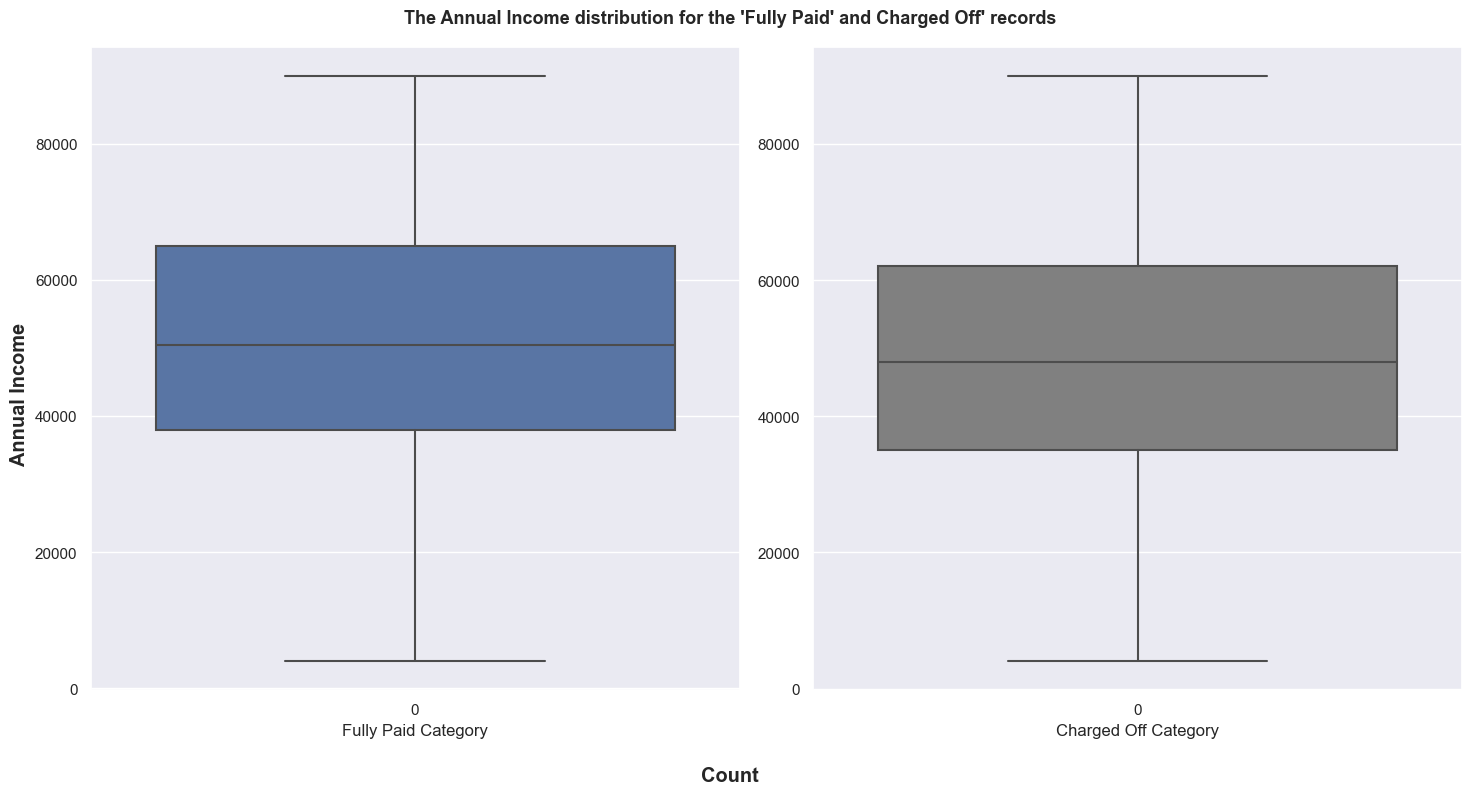

In [169]:
# Removing the 20% of the outliers from the annual income and plot the graph.

fullypaid_annual_inc_below90k = loan_data_fully_paid_records[loan_data_fully_paid_records.annual_inc<90000].reset_index(drop="True")
chargedoff_annual_inc_below90k = loan_data_charged_off_records[loan_data_charged_off_records.annual_inc<90000].reset_index(drop="True")

# Box plot for the Annual Income distribution.
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_box("annual_inc", fig, axes, "The Annual Income distribution for the 'Fully Paid' and Charged Off' records", 13,
         "Count", 0, "Annual Income", 0, fullypaid_annual_inc_below90k, chargedoff_annual_inc_below90k)


#### Observations:
1. The average annual income of 'Charged Off' category is lesser than 'Fully Paid' category.
2. `The Annual income consider as a discriminator variable.`
--------------

#### `Column - `**`Loan Amount`**

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [170]:
# Basic analysis with describe
loan_data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

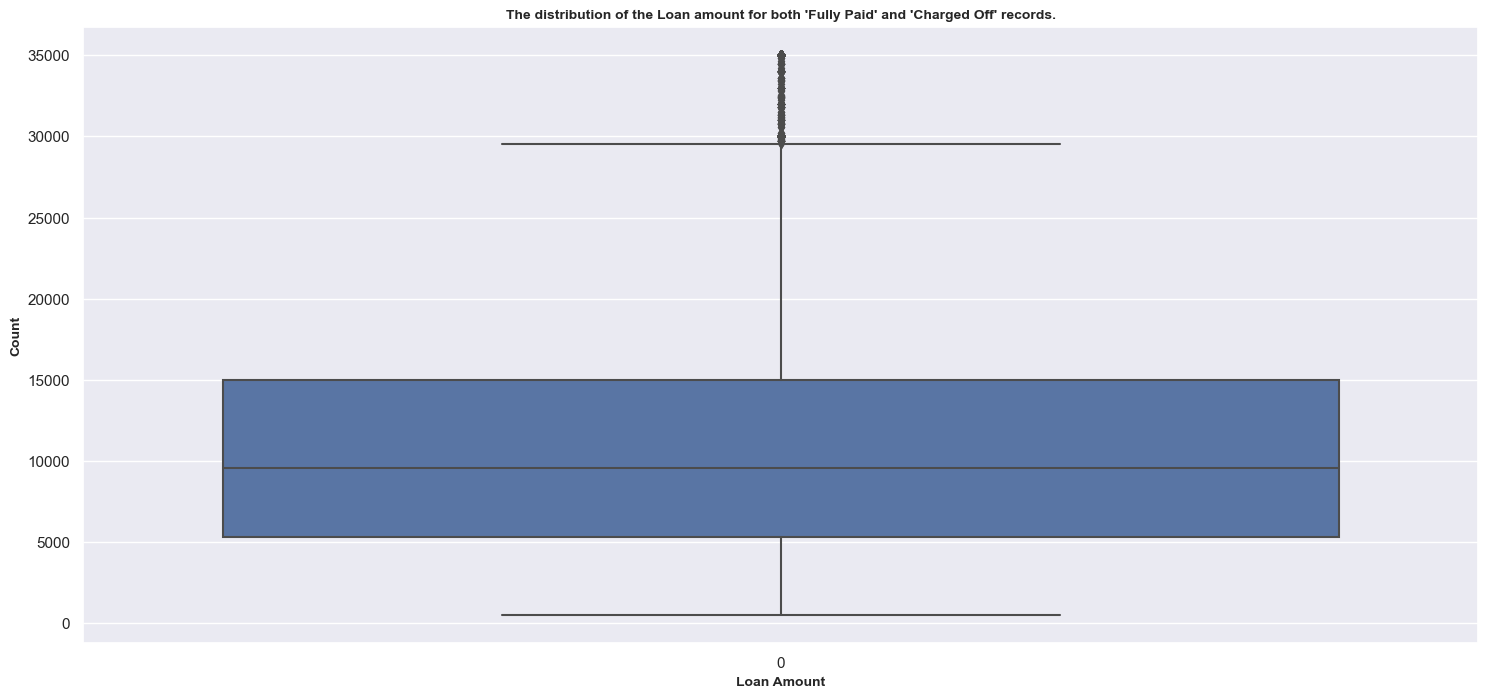

In [171]:
# Box plot for loan_amnt.
bplot = sns.boxplot(data=loan_data.loan_amnt)
plt.title("The distribution of the Loan amount for both 'Fully Paid' and 'Charged Off' records.",fontsize=10, fontweight="bold") 
plt.xlabel("Loan Amount", fontsize=10, fontweight="bold")
plt.ylabel("Count", fontsize=10, fontweight="bold")
plt.show()

`Need to remove the outliers presented in this Loan amount column.`

In [172]:
# Find out the upper whisker to filter the outlier records based on that value.

upper_percentile = loan_data.loan_amnt.quantile(0.75)
lower_percentile = loan_data.loan_amnt.quantile(0.25)
iqr = upper_percentile - lower_percentile
upper_whisker = upper_percentile+(1.5*iqr)
upper_whisker

29550.0

`Filter the Loan amount lesser than upper whisker value.`

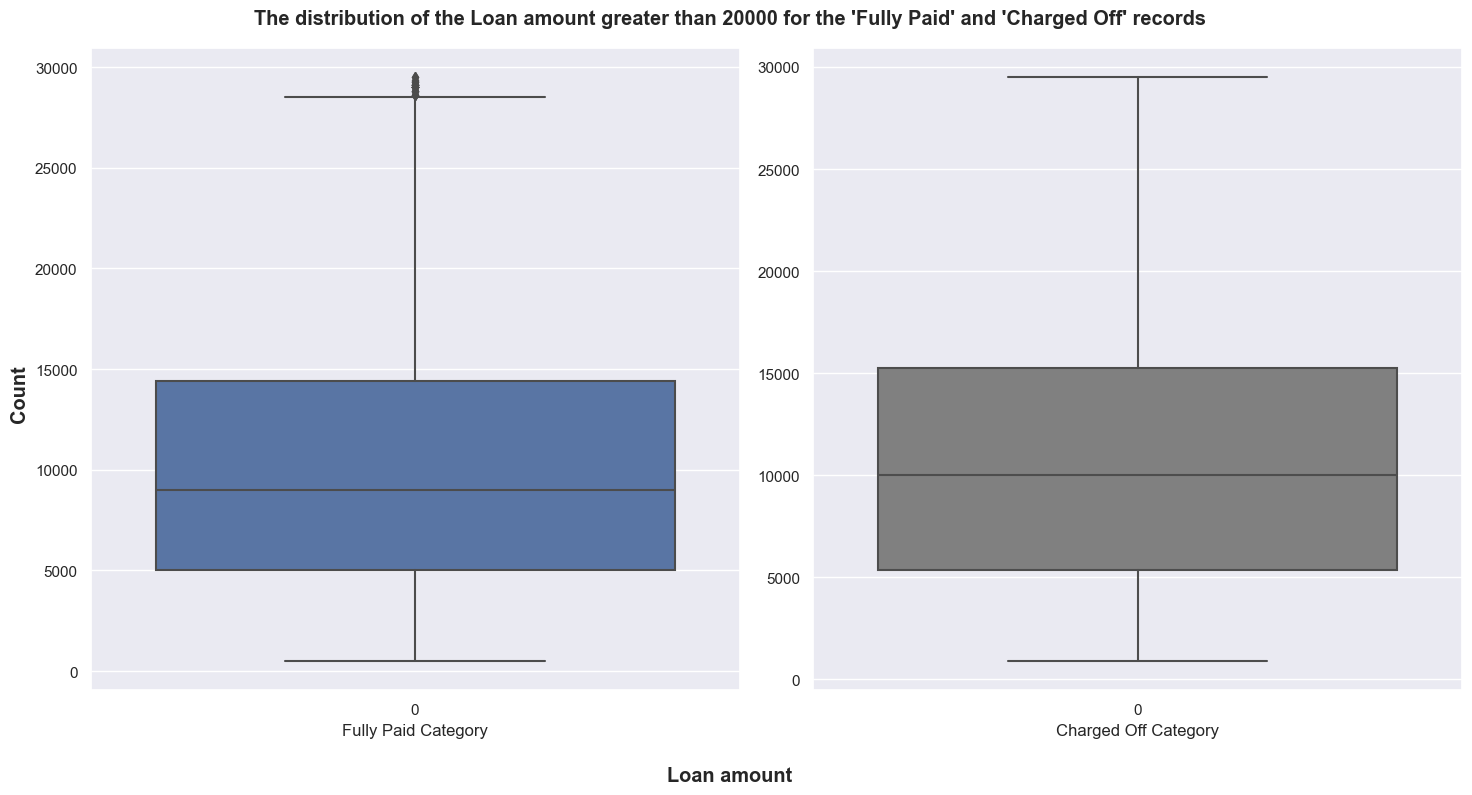

In [173]:
# Box plot for the loan_amnt lesser than upper whisker value (i.e) 29550.

loanamt_fully_paid_below_upperwhisker = loan_data_fully_paid_records[loan_data_fully_paid_records.loan_amnt<upper_whisker].reset_index(drop="True")
loanamt_charged_off_below_upperwhisker = loan_data_charged_off_records[loan_data_charged_off_records.loan_amnt<upper_whisker].reset_index(drop="True")

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_box("loan_amnt", fig, axes, "The distribution of the Loan amount greater than 20000 for the 'Fully Paid' and 'Charged Off' records",
         0,"Loan amount", 0, "Count", 0,loanamt_fully_paid_below_upperwhisker, loanamt_charged_off_below_upperwhisker)


In [174]:
upper_percentile

15000.0

`It seems the no of records above upper percentile of loan amount dataset needs to cross verify.`
<br>`Segmented the dataset into 2 bins for better identification.`

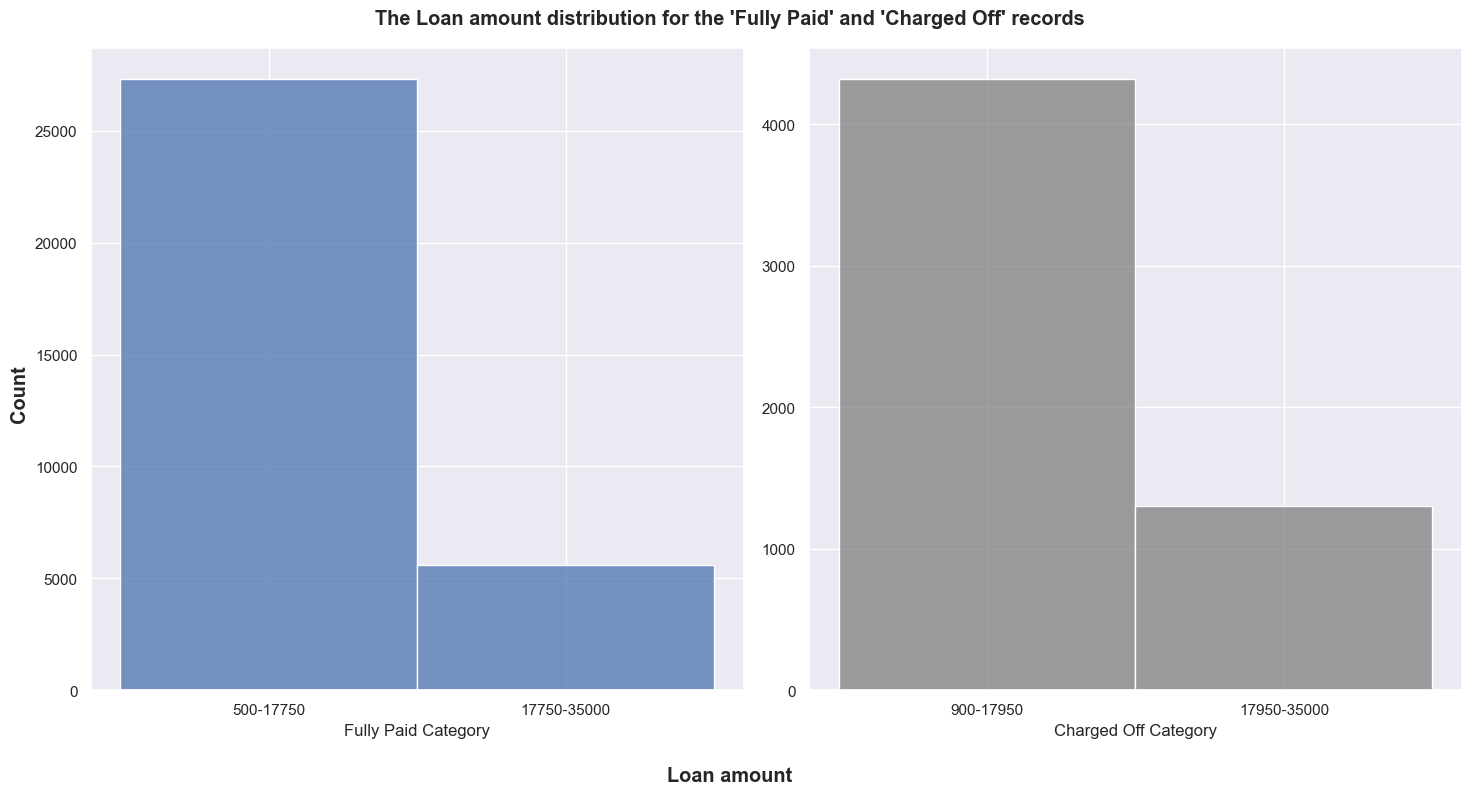

In [175]:
# Creating histogram plot for loan amount 
loan_amt_split_range = np.linspace(loan_data_fully_paid_records['loan_amnt'].min(), loan_data_fully_paid_records['loan_amnt'].max(), 3, dtype=int).tolist()
fully_paid_loanamt_splitby_q1_df = pd.DataFrame(pd.cut(loan_data_fully_paid_records['loan_amnt'],loan_amt_split_range, labels=convertRangeToTextLabel(loan_amt_split_range,"-")))
loan_amt_split_range = np.linspace(loan_data_charged_off_records['loan_amnt'].min(), loan_data_charged_off_records['loan_amnt'].max(), 3, dtype=int).tolist()
charged_off_loanamt_splitby_q1_df = pd.DataFrame(pd.cut(loan_data_charged_off_records['loan_amnt'],loan_amt_split_range, labels=convertRangeToTextLabel(loan_amt_split_range,"-")))

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
plot_hist("loan_amnt", 50, fig, axes, "The Loan amount distribution for the 'Fully Paid' and 'Charged Off' records",
          0, "Loan amount", 0 , "Count", 0, fully_paid_loanamt_splitby_q1_df, charged_off_loanamt_splitby_q1_df)



#### Observations:
1. Majority of cases had loan amount of 10000 for both Fully Paid and Charged Off categories.
2. The median distribution for the loan amount shows slight variation with both categories.
3. The **Loan amount greater than Q3 have variation between Fully Paid and Charged-Off**.
4. `The Loan Amount consider as a discriminator variable.`
----------------------------------------------------------------

#### `Column - `**`delinq_2yrs`**
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

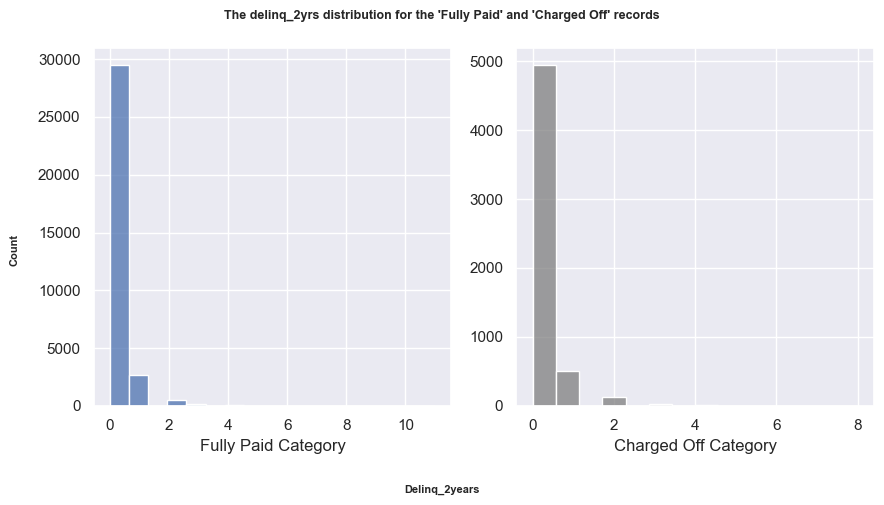

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
plot_hist("delinq_2yrs",0,fig, axes,"The delinq_2yrs distribution for the 'Fully Paid' and 'Charged Off' records", 9, 
          "Delinq_2years", 8, "Count", 8)

#### Observations:
1. This distribution is almost similar with both categories 'Fully Paid' and 'Charged Off'.
2. `The delinq_2yrs variable is not a great discriminator.`
--------------

#### `Column - `**`Term`**
The number of payments on the loan. Values are in months and can be either 36 or 60.

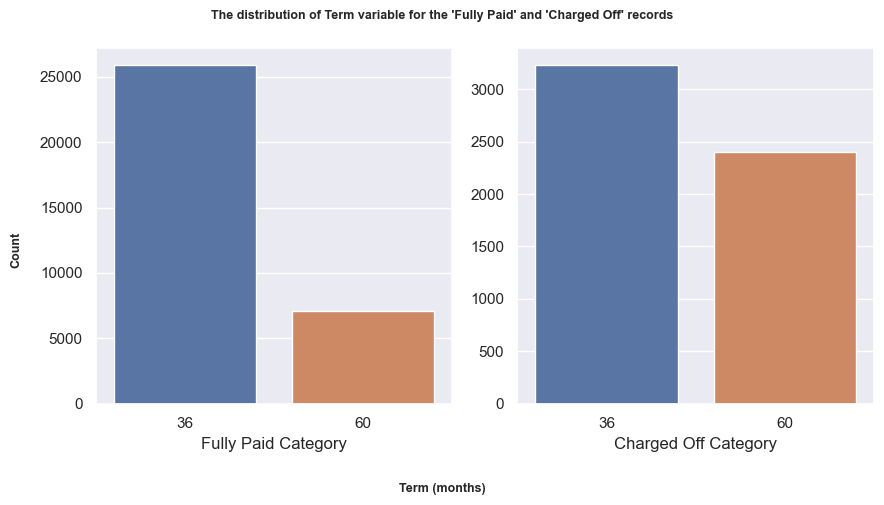

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
plot_count("term", fig, axes, "The distribution of Term variable for the 'Fully Paid' and 'Charged Off' records", 9, 
          "Term (months)", 9, "Count", 9)


#### Observations:

1. This plot shows the records fall on 60 month is lesser in 'Fully Paid' category but much higher in 'Charged Off' category.
2. `This is a clear indication of the variable 'term' is a great discriminator.`

#### `Column - `**`Revolving line utilization rate`**
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

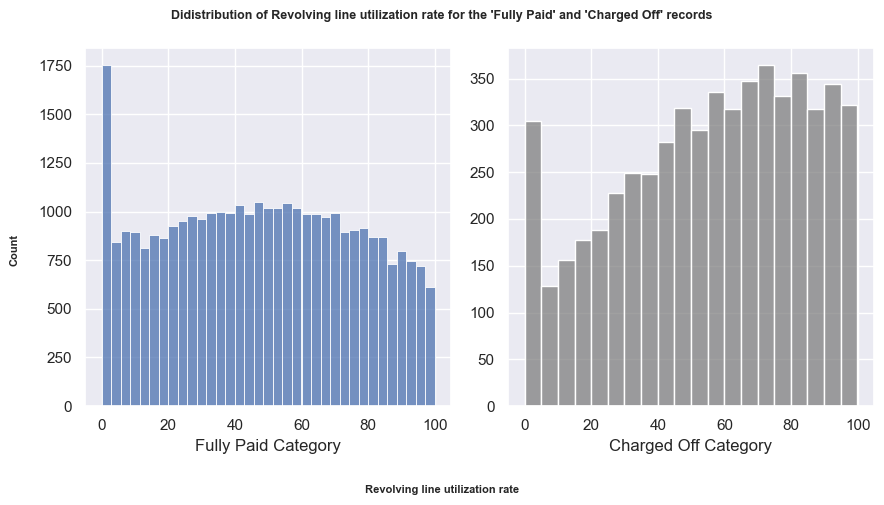

In [178]:
fig, axes = plt.subplots(1, 2, figsize=(9, 5))
plot_hist("revol_util",0,fig, axes,"Didistribution of Revolving line utilization rate for the 'Fully Paid' and 'Charged Off' records", 9, 
          "Revolving line utilization rate", 8, "Count", 8)

#### Observations:

1. This plot shows the Revolving line utilization rate is almost even in 'Fully Paid' but in incremental fashion on 'Charged Off' category.
2. `This is a clear indication of the variable revol_util is a great discriminator.`

***Column - Verification Status***

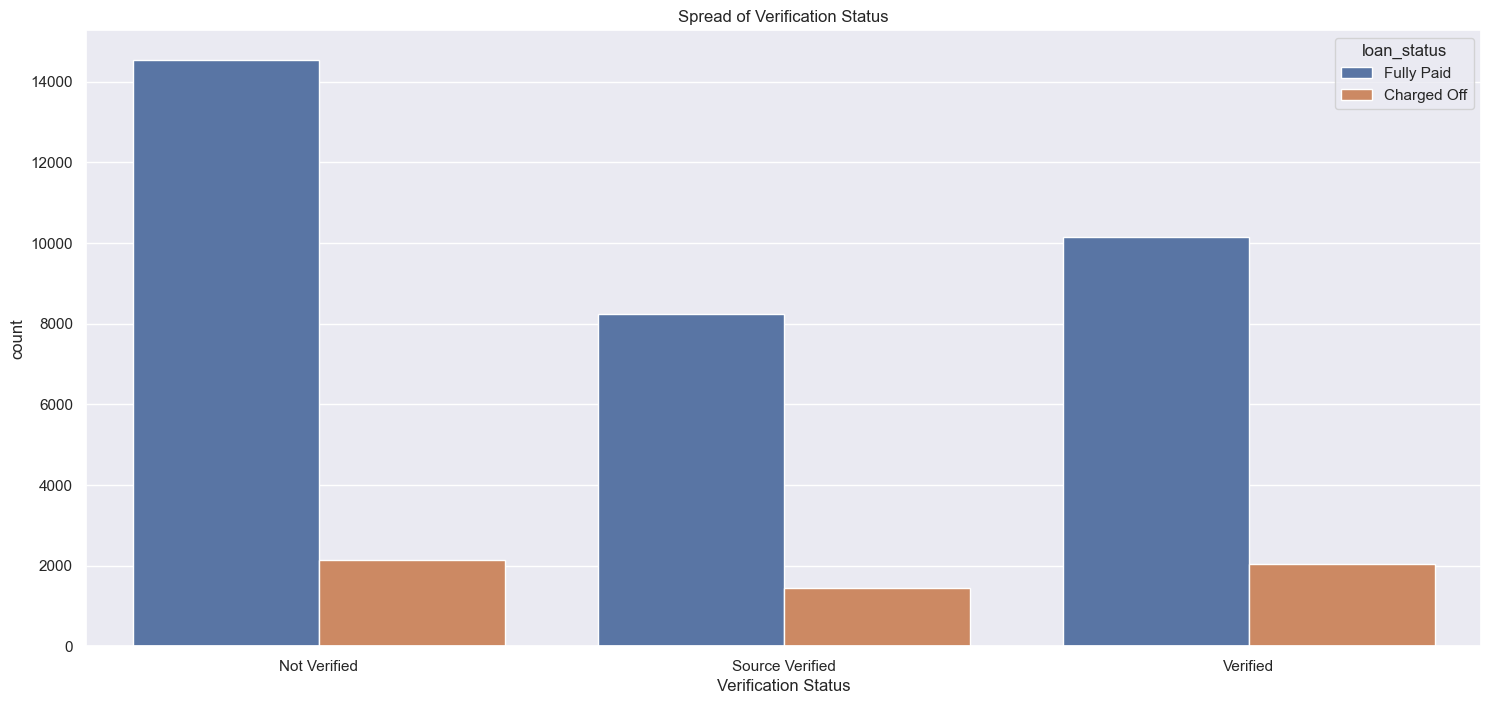

In [179]:
loan_data.verification_status = loan_data.verification_status.astype('category')
sns.countplot(data=loan_data, x='verification_status', hue='loan_status')
plt.xlabel("Verification Status")
plt.title("Spread of Verification Status")
plt.show()

**Observation:**
1. About half of overall count is verified or have source verified

## Bivariate Analysis

In this analysis we compare 2 cols to determine if there are any relationship between them. Mostly we will be performing this comparison between a dependent column and many other independent columns. 

### Term Vs LoanAmount

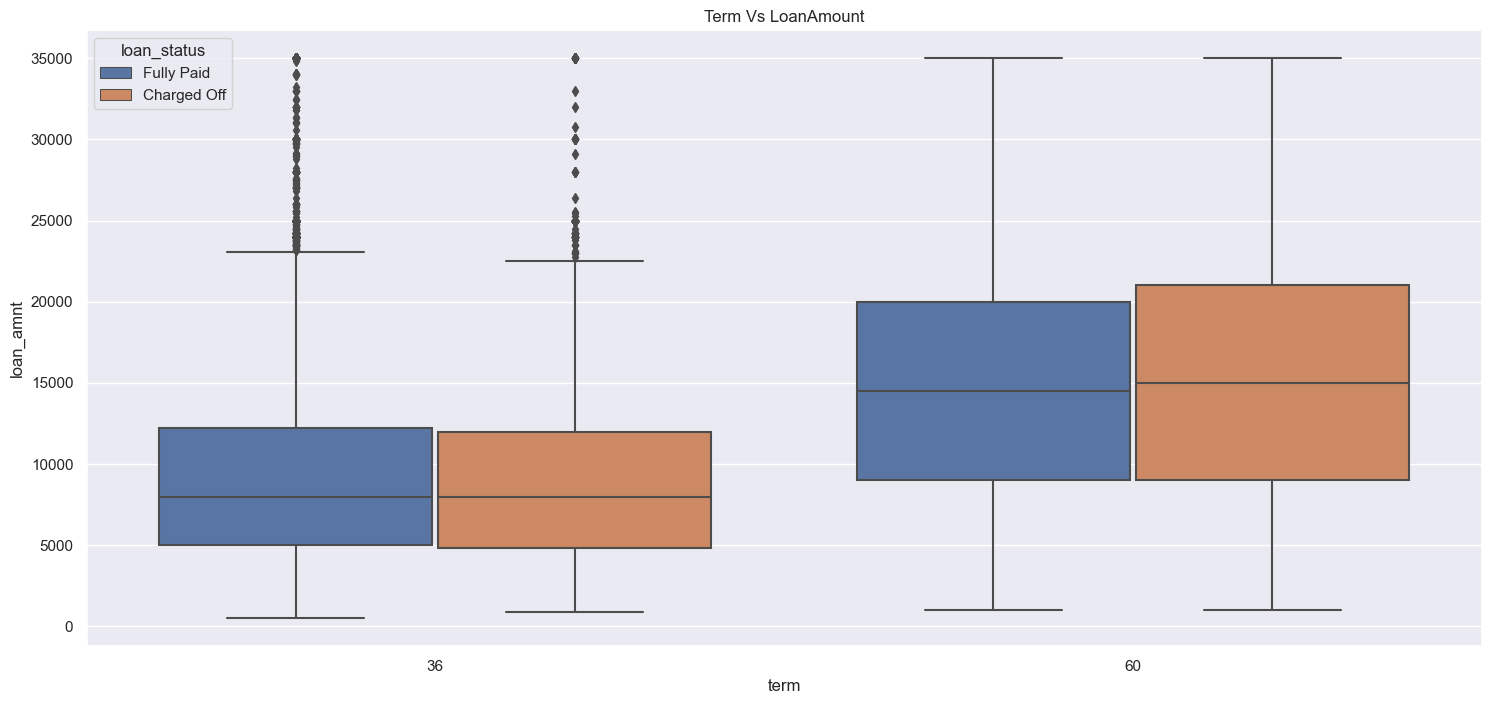

In [180]:
#Determining the relationship between Loan term and Loan amount with the help of a box plot and bar plot
sns.boxplot(x='term', y='loan_amnt', hue='loan_status',data=loan_data)
plt.title('Term Vs LoanAmount')
plt.show()

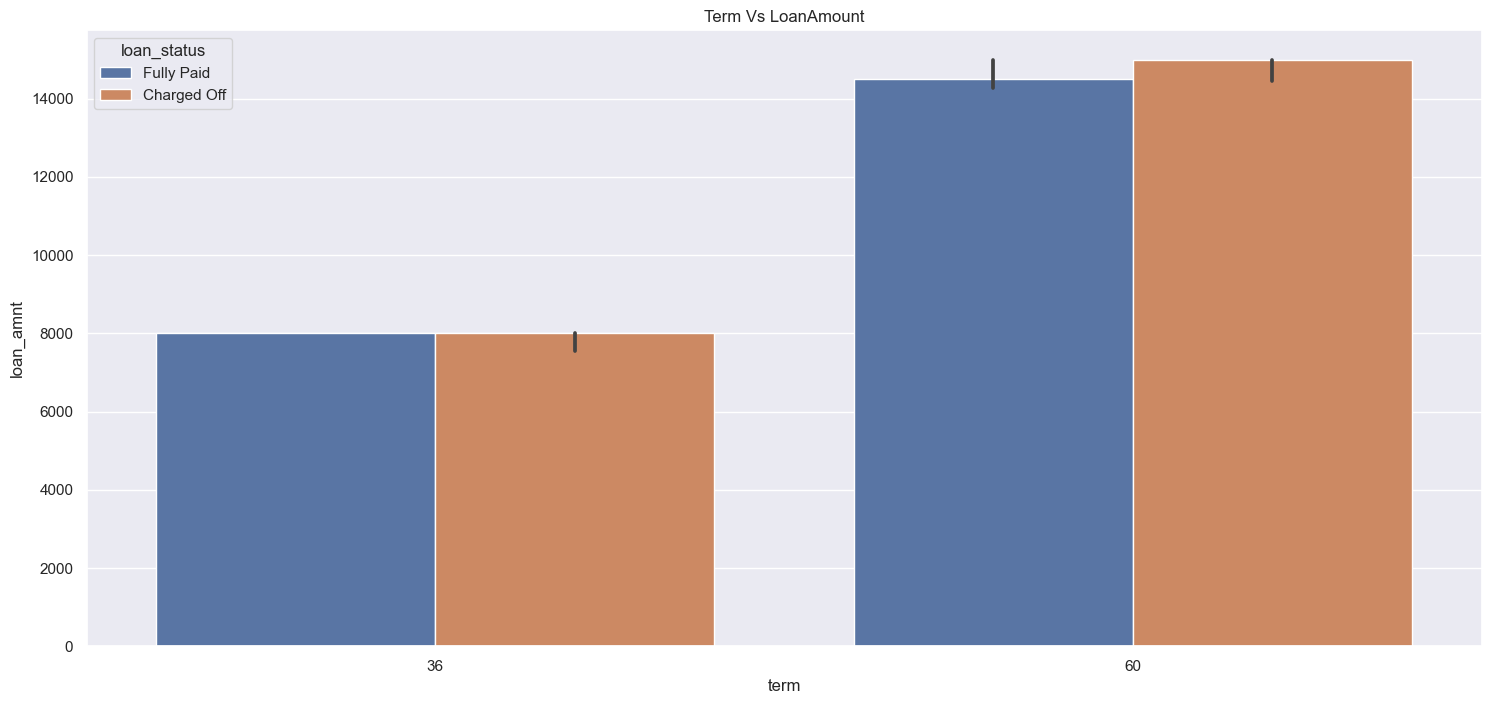

In [181]:
#Using bar plot now
sns.barplot(x='term',y='loan_amnt', hue='loan_status', data=loan_data,estimator=np.median)
plt.title('Term Vs LoanAmount')
plt.show()

**Observations:**
1. Loan Amount **cannot be** considerered as a deciding column for 'Charged Off' either in 36 month or 60 month term.
2. In both 36 and 60 month term, split is almost same for 'Fuly paid' and 'Charged Off'

### Term Vs InterestRate

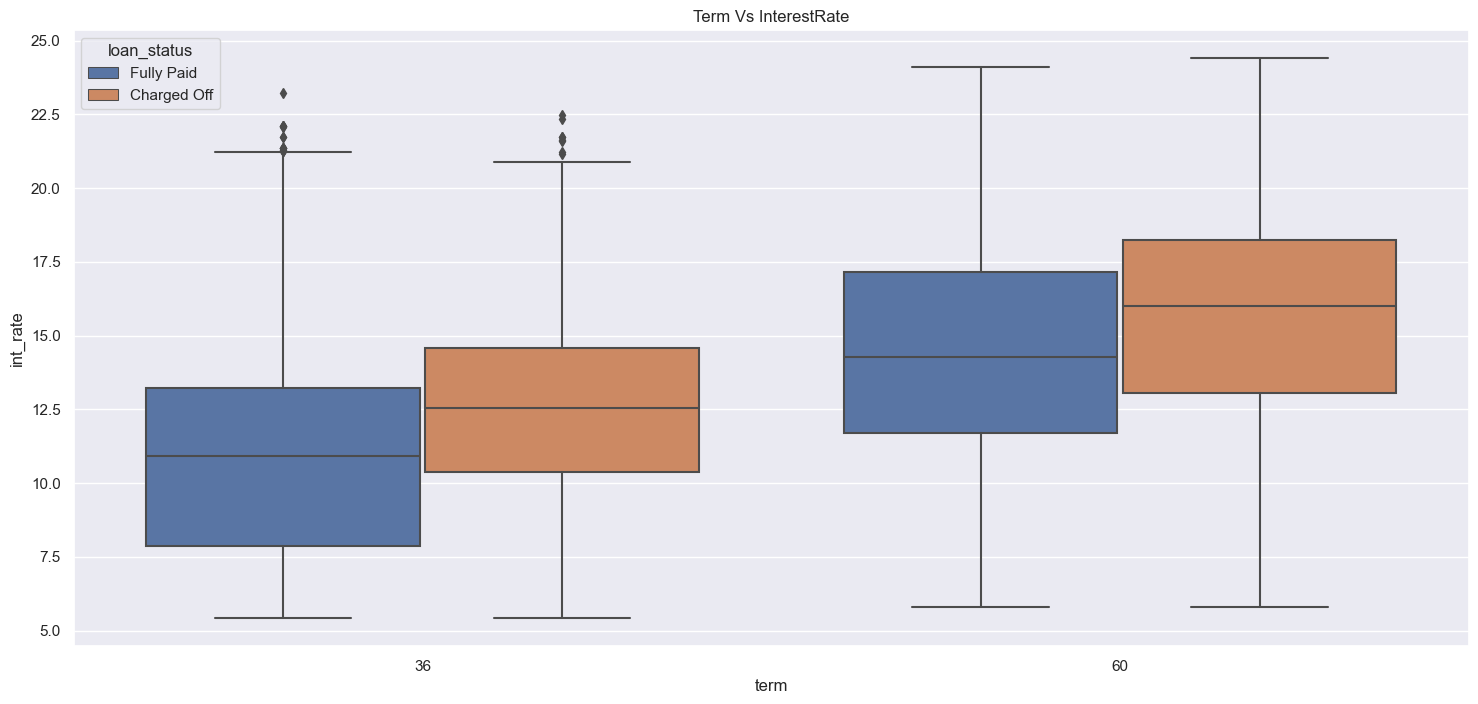

In [182]:
#Determining the relationship between Loan term and Interest Rate with the help of a box plot and bar plot
sns.boxplot(x='term', y='int_rate', hue='loan_status',data=loan_data)
plt.title('Term Vs InterestRate')
plt.show()

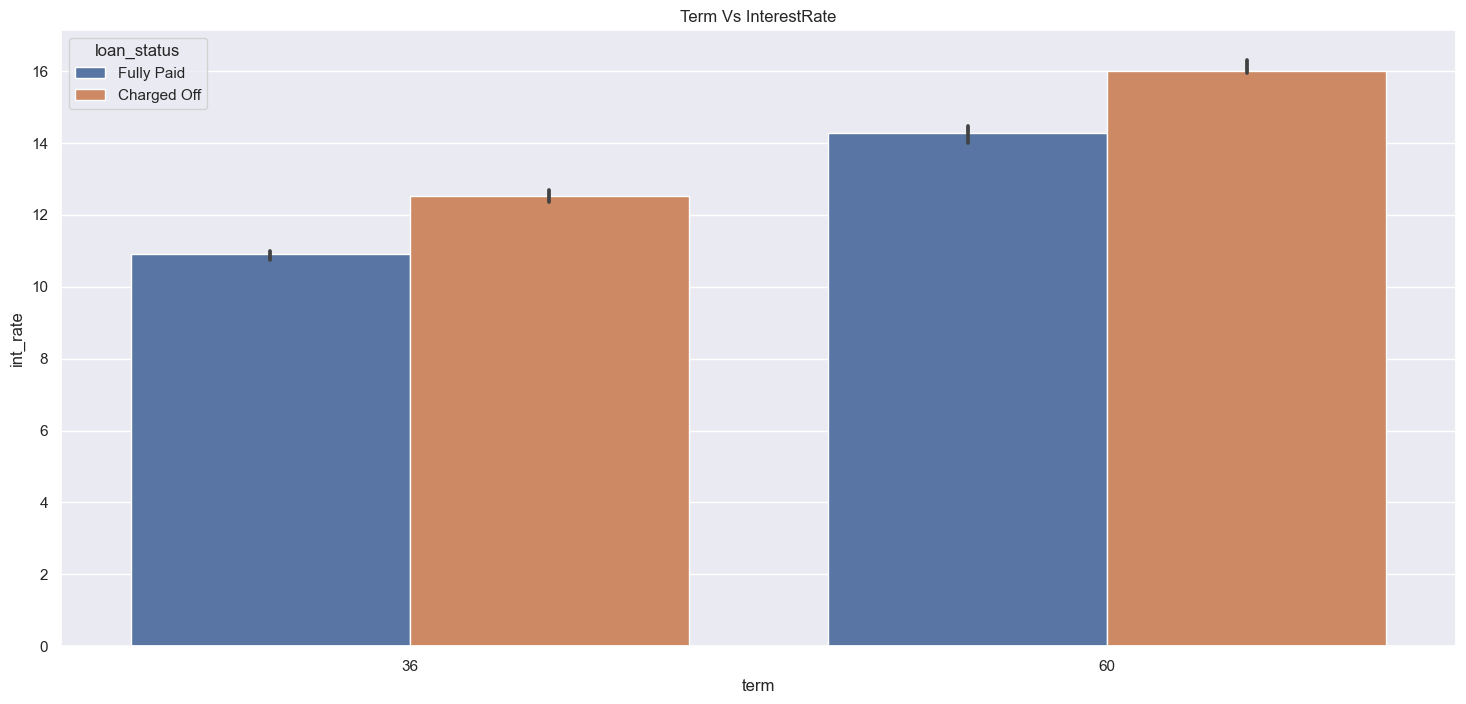

In [183]:
#Using bar plot now
sns.barplot(x='term',y='int_rate', hue='loan_status', data=loan_data,estimator=np.median)
plt.title('Term Vs InterestRate')
plt.show()

**Observation:**
1. With higher interest rate, its observed the 'Charged Off' loans are also higher for both 36 and 60 month term.

### Term Vs DebitToIncome

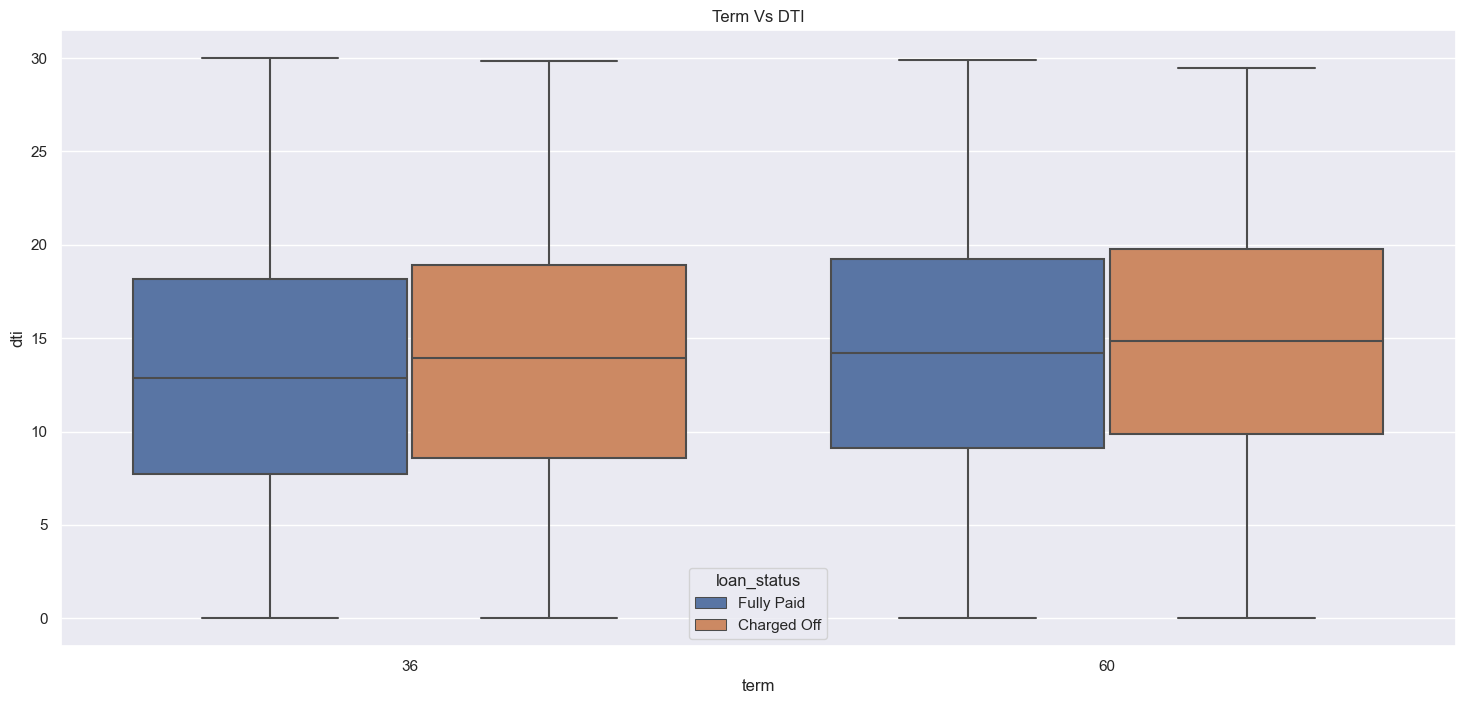

In [184]:
#Determining the relationship between Loan term and DTI(DebitToIncome Ratio) with the help of a box plot and bar plot
sns.boxplot(x='term', y='dti', hue='loan_status',data=loan_data)
plt.title('Term Vs DTI')
plt.show()

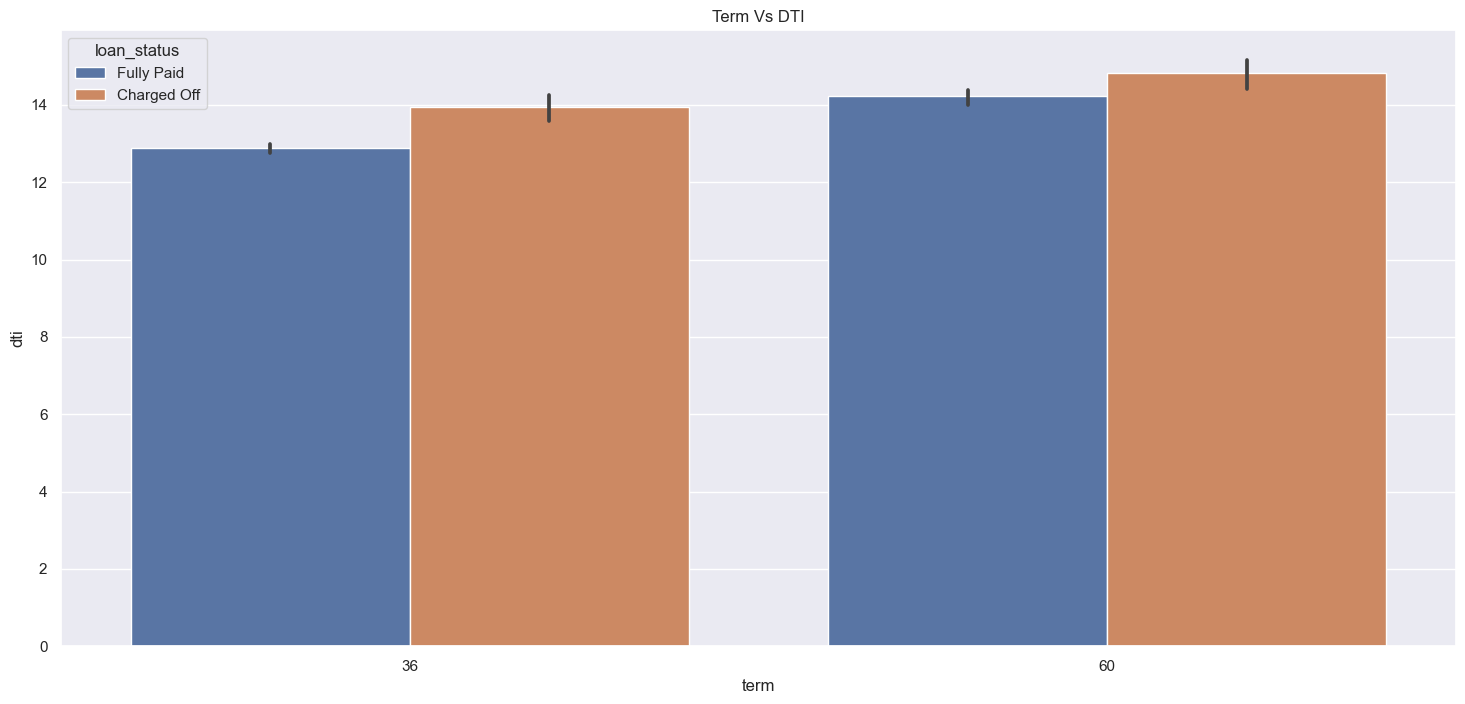

In [185]:
#Using bar plot now
sns.barplot(x='term',y='dti', hue='loan_status', data=loan_data,estimator=np.median)
plt.title('Term Vs DTI')
plt.show()

**Observations:**
1. Only Slight chance to be 'Charged Off' in 60 month term with higher DTI

### EmploymentLength Vs LoanStatus.

We are comparing the employment tenure and loan status to determine if it has a relationship which can indicate chances of 'Charged Off' loan

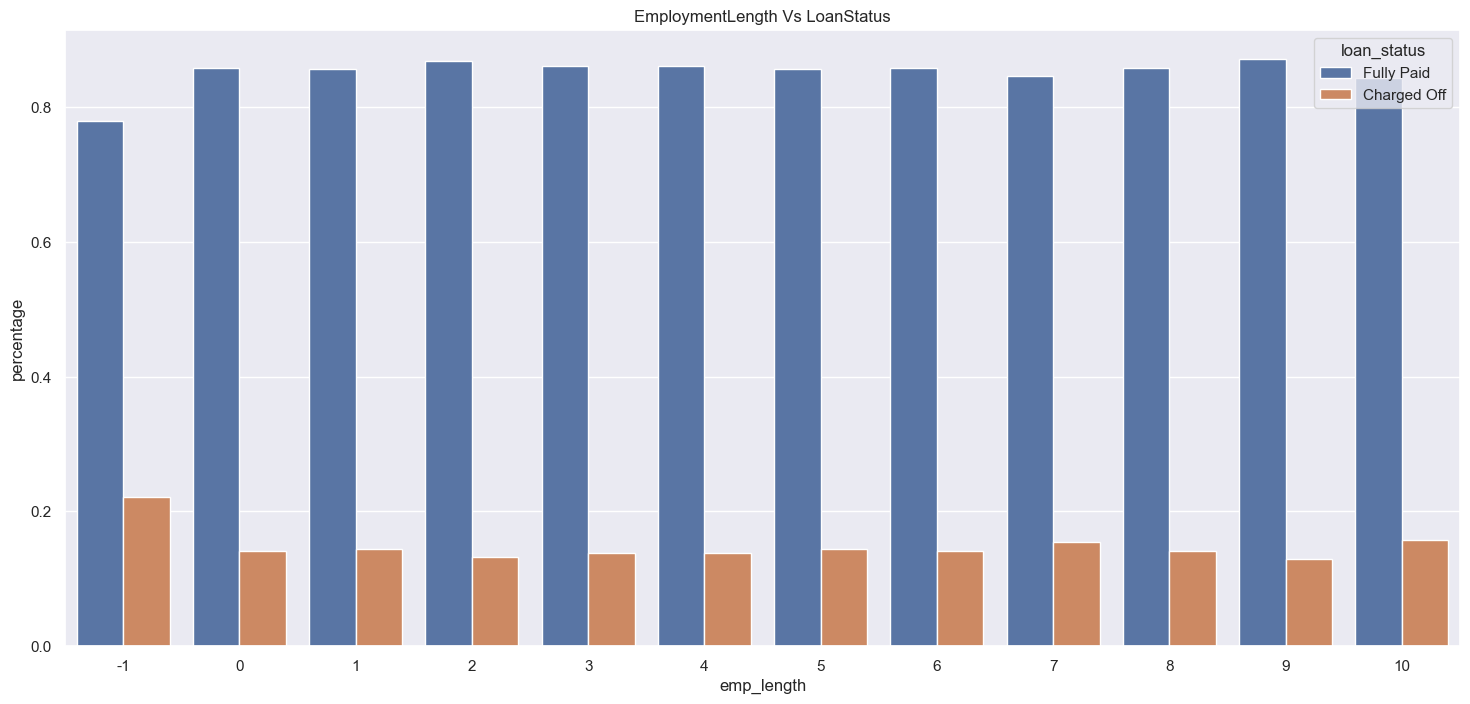

In [186]:
empLeng_bivar = loan_data.groupby(['emp_length','loan_status'], as_index=False)['id'].count()
## Go thru each emp_length group and divide the number of loans for each 'loan_status' in the same group by total count in the same group 'emp_legth'. 
# REsult is the percentage of each 'loan_status' category within each 'empl_length' group
# VIsualization of the proportion of 'Fully Paid' and 'Charged OFF' loans within each 'Emp_lenth'
empLeng_bivar['percentage'] = empLeng_bivar[['id','emp_length']].groupby('emp_length').transform(lambda x:x/x.sum())
sns.barplot(x='emp_length',y='percentage',hue='loan_status',data=empLeng_bivar, hue_order=['Fully Paid','Charged Off'])
plt.title('EmploymentLength Vs LoanStatus')
plt.show()

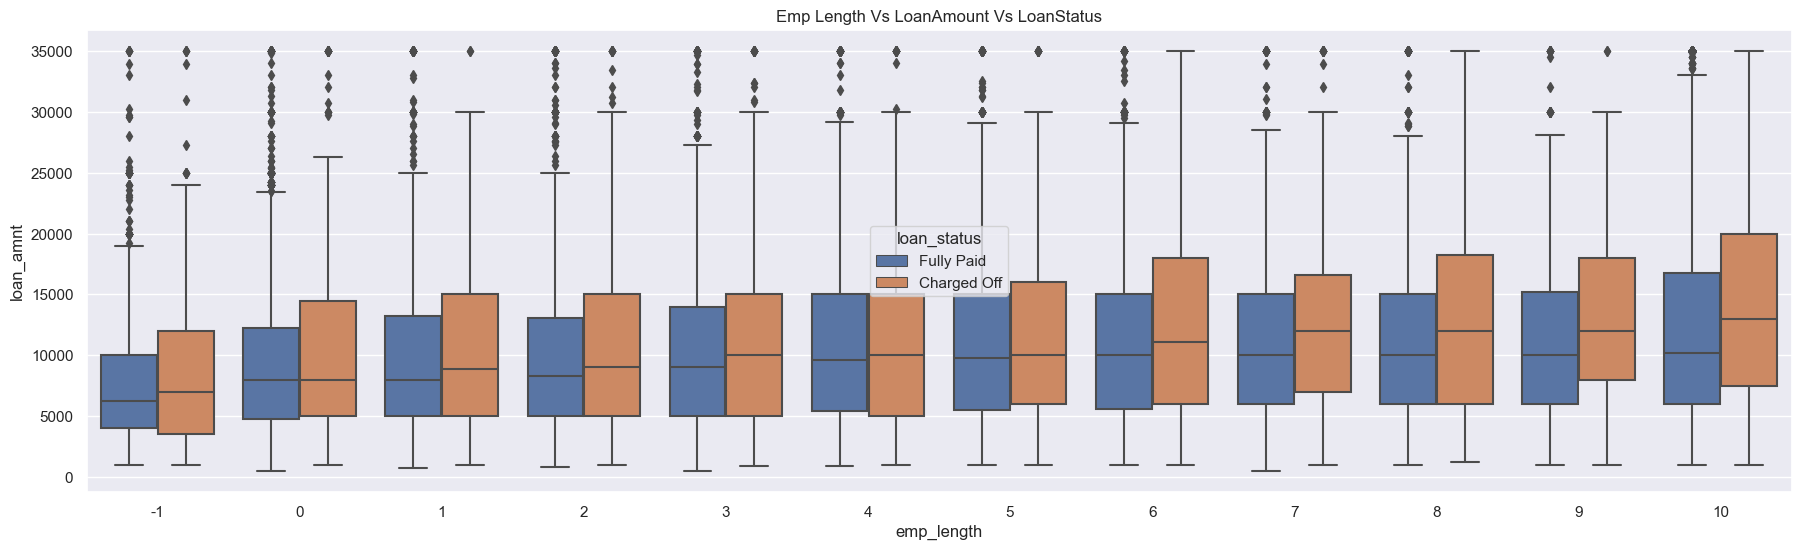

In [187]:
# Throwing loan amount also into the mix
plt.figure(figsize=(22,6))
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=loan_data)

plt.title('Emp Length Vs LoanAmount Vs LoanStatus')
plt.show()

**Observations:**
1. In EmploymentLength Vs LoanStatus graph, `Employee Length or tenure does not majorly influence the 'Charged Off' loans.`
2. The `Loan Amount increases slightly as the tenure of employee increases in Emp Length Vs LoanAmount Vs LoanStatus graph`.
<br> Total 'Charged Off' loans also increases with tenure.

### Correlation Matrix

We are trying find the correlation between the variables/columns of full data set

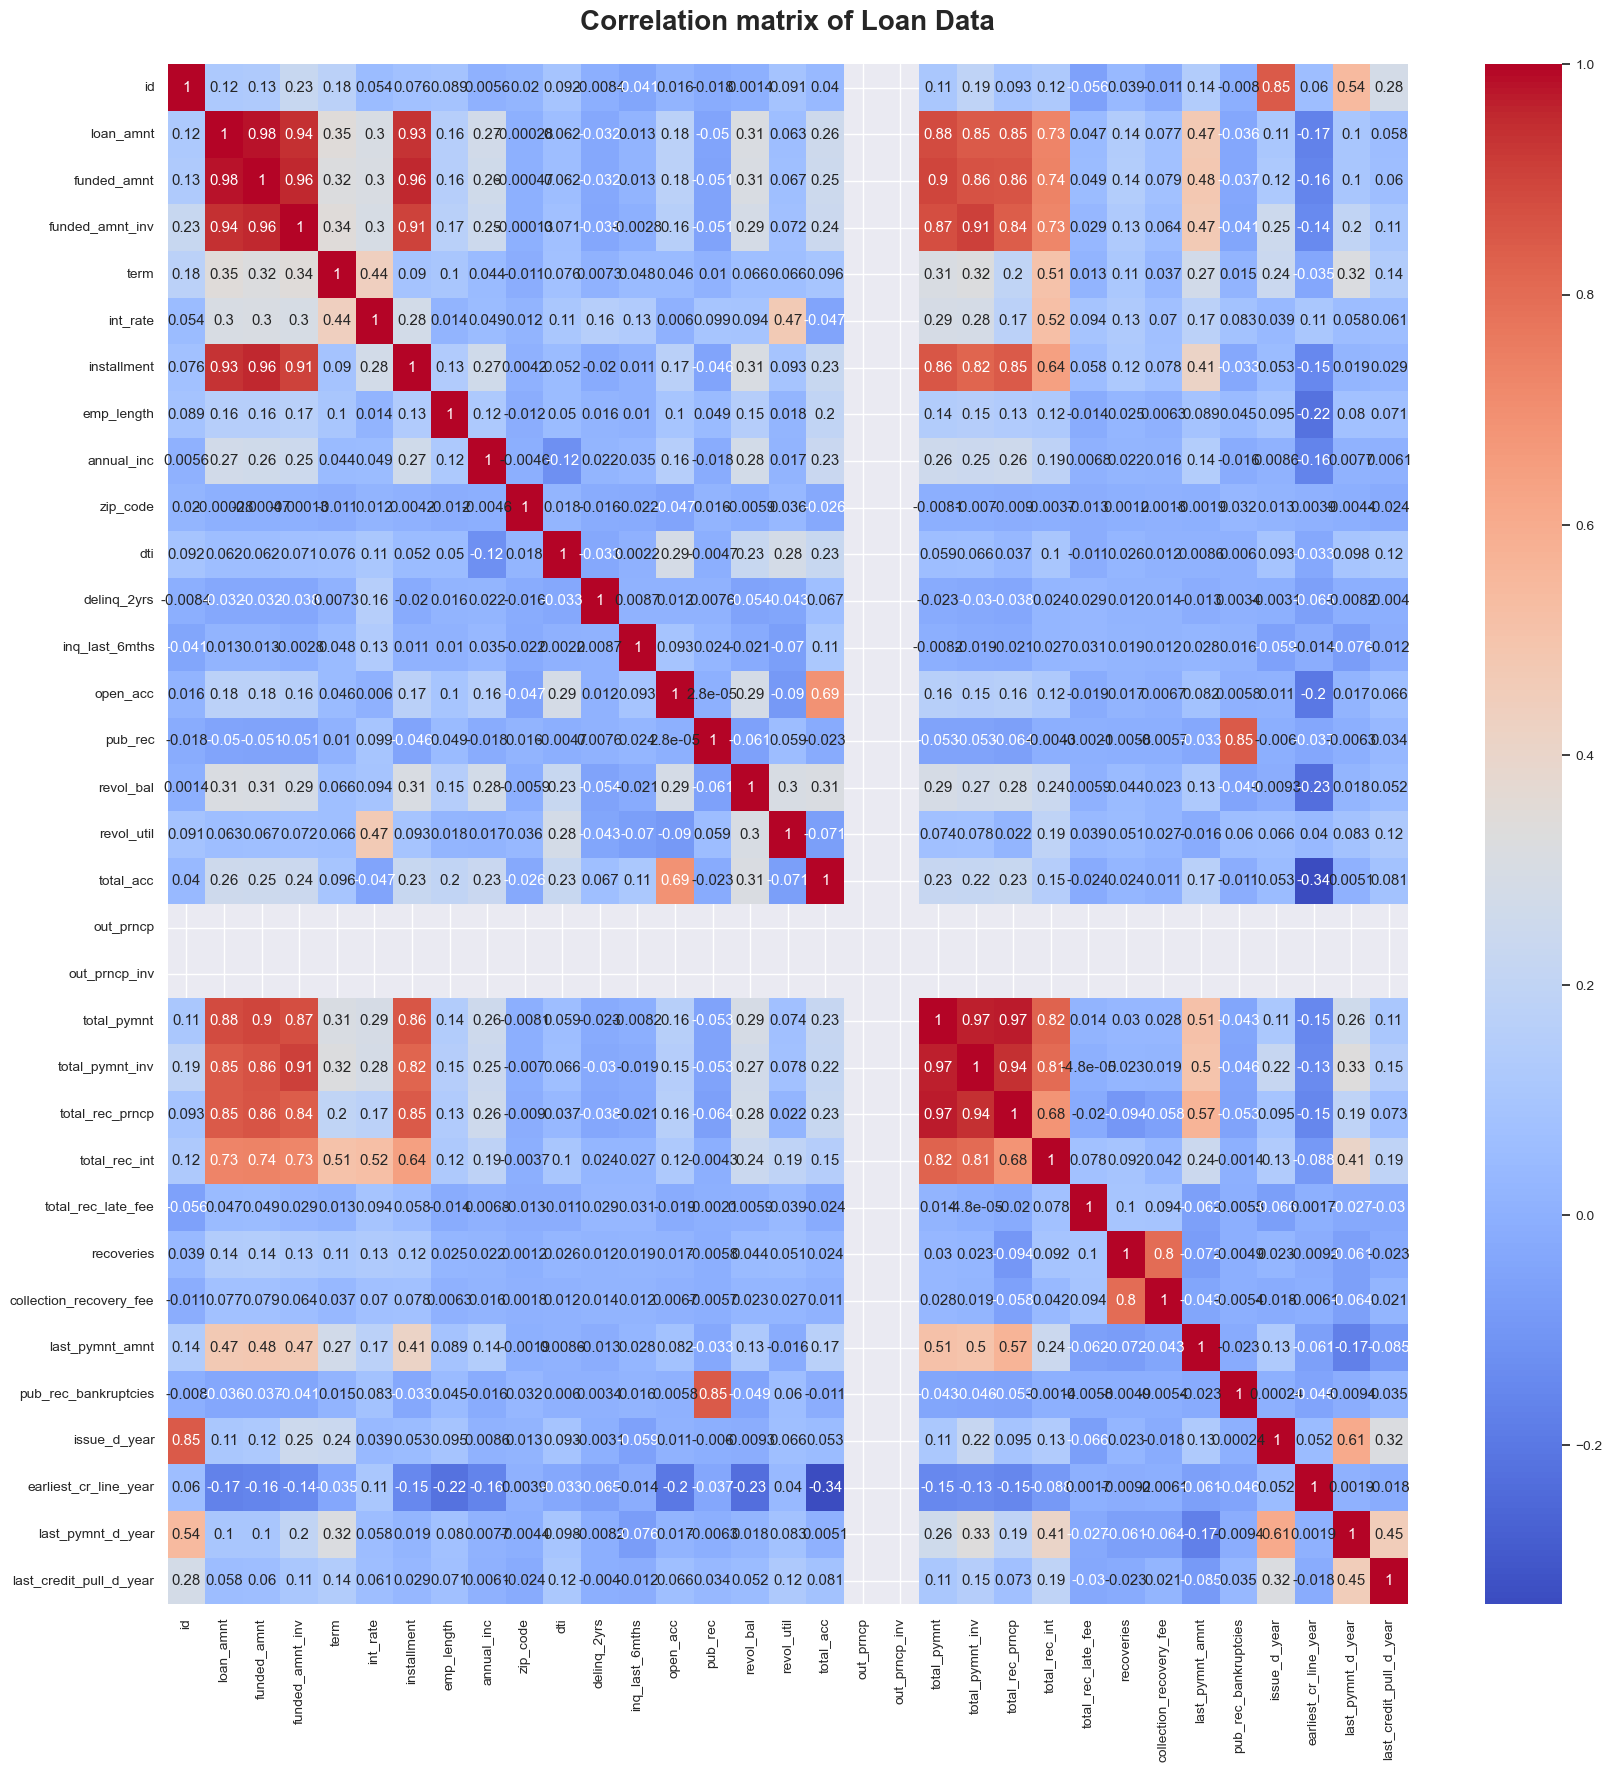

In [188]:
#trying correlation matrix
correlation_matrix=loan_data.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.set(font_scale=0.9)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of Loan Data",fontweight="bold",fontsize=20,pad=25)
plt.show()

In [189]:
loan_data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'annual_inc_catgry'],
      dtype='object')

**Trying to figure out how strongly correlated are these cols 'loan_amnt','funded_amnt','int_rate','installment','emp_length','annual_inc','dti','term'**

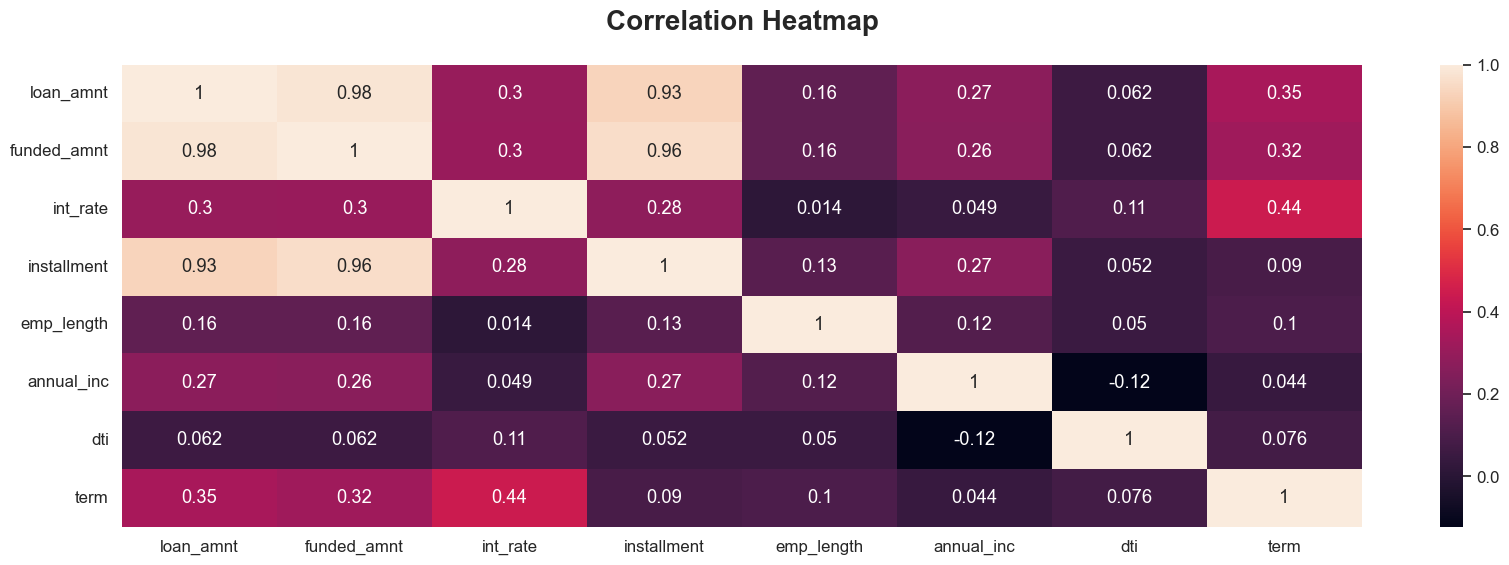

In [190]:
loan_data_sub = loan_data[['loan_amnt','funded_amnt','int_rate','installment','emp_length','annual_inc','dti','term']]
loan_data_sub_correlation = loan_data_sub.corr()
plt.figure(figsize=(20,6))
sns.set(font_scale=1.1)
sns.heatmap(loan_data_sub_correlation, annot=True)
plt.title('Correlation Heatmap',fontweight="bold",fontsize=20, loc='center', pad=25)
plt.show()

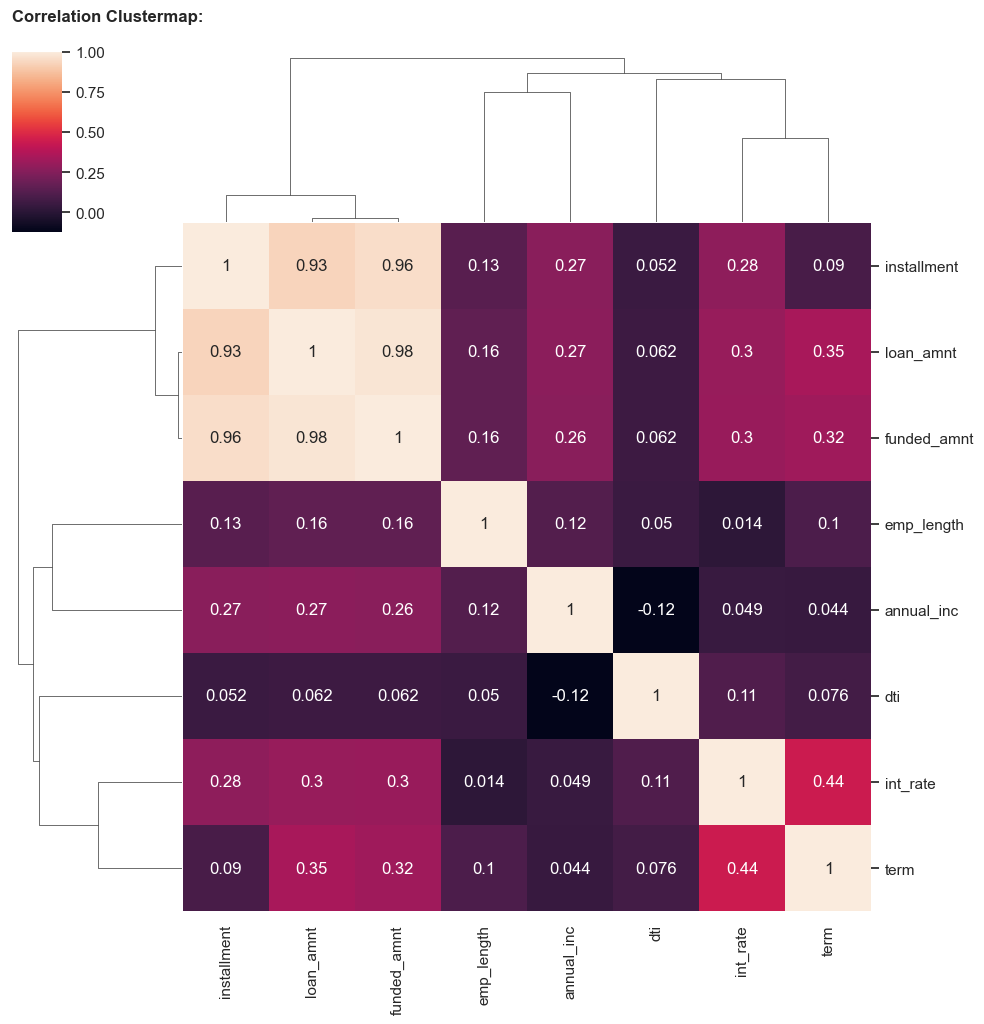

In [191]:
sns.set(font_scale=1)
clusterPlot = sns.clustermap(loan_data_sub_correlation, annot=True)
plt.title("Correlation Clustermap:", loc='left', pad=22, fontweight="bold")
plt.show()

**Observations:**
1. Strong correlation is visible between 'installment','loan_amnt','funded_amnt'
2. The 'annual_inc' is negatively correlated with 'dti' which implies that 'dti' is LOW when 'annual_inc' id HIGH.
3. The 'emp_length' and 'annual_inc' are positively correlated.

### Annual Income Vs LoanStatus


In [192]:
#groupBy based on the annual_inc_catgry and loan status and calculates the count of loans for each of this combination
annual_inc_bivar = loan_data.groupby(['annual_inc_catgry','loan_status']).loan_status.count().unstack().reset_index()
annual_inc_bivar.head(10)

loan_status,annual_inc_catgry,Charged Off,Fully Paid
0,0-200000,5567,32440
1,200000-400000,48,432
2,400000-600000,5,37
3,600000-800000,5,21
4,800000-1000000,1,7


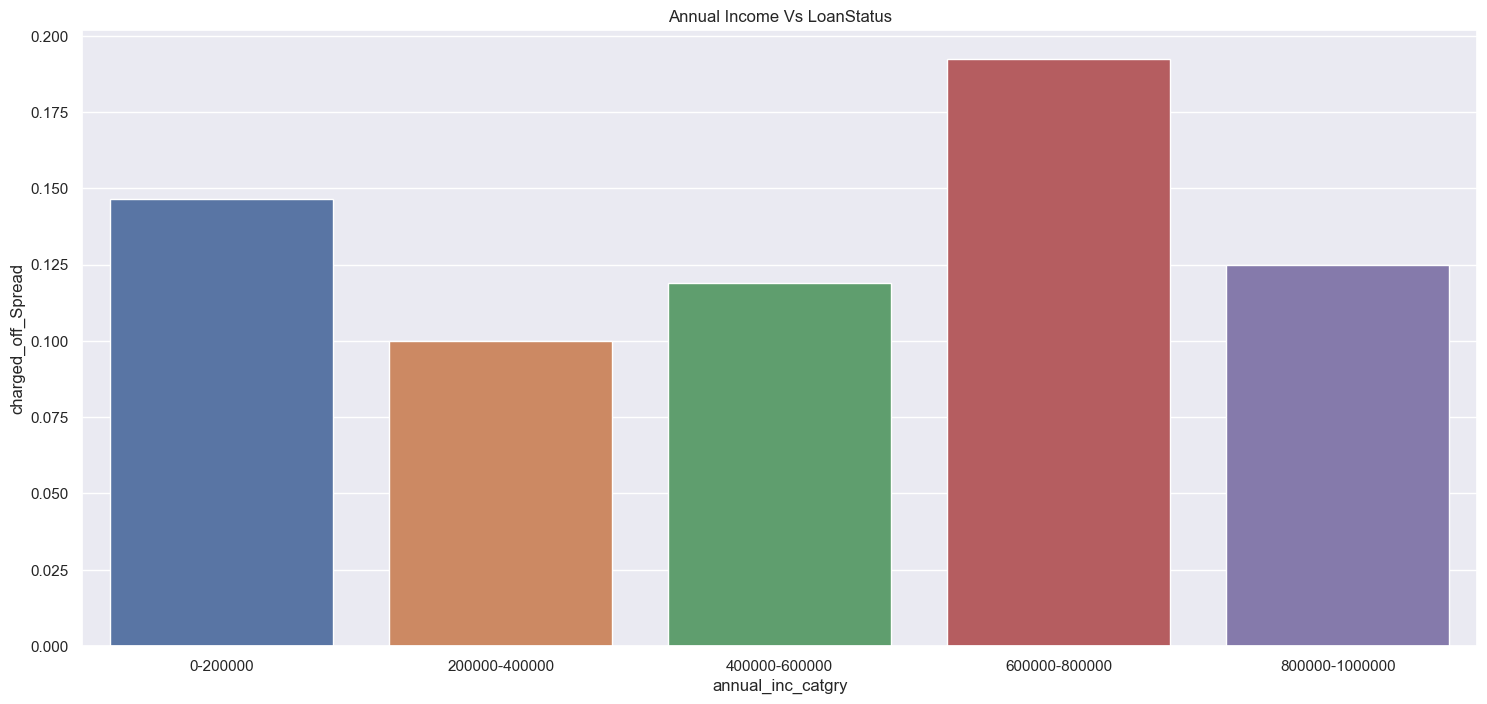

In [193]:
# lets split-out the cahrged-off loans alone and plot against it[]
annual_inc_bivar['charged_off_Spread'] = annual_inc_bivar['Charged Off']/(annual_inc_bivar['Charged Off'] + annual_inc_bivar['Fully Paid'])
sns.barplot(x='annual_inc_catgry',y='charged_off_Spread',data=annual_inc_bivar, hue_order=['Fully Paid','Charged Off'])
sns.set(rc = {'figure.figsize':(18,8)})
plt.title('Annual Income Vs LoanStatus')
plt.show()

**Observations:**
1. High chance of 'default' if 'annual_inc' is in 60K-80K category
2. The annual_inc_catgry 80K-100K has minimal in 'Charged Off'.
3. Lowest annual_inc_catgry of upto 20K has the highest in 'Charged Off'.
4. Inference as annual_inc increases Charged Off loan count decreases.

### Loan Amount Vs Interest Rate

Comparing the Loan amount to Interest RAte using a scatter plot to determine if there is a relation.

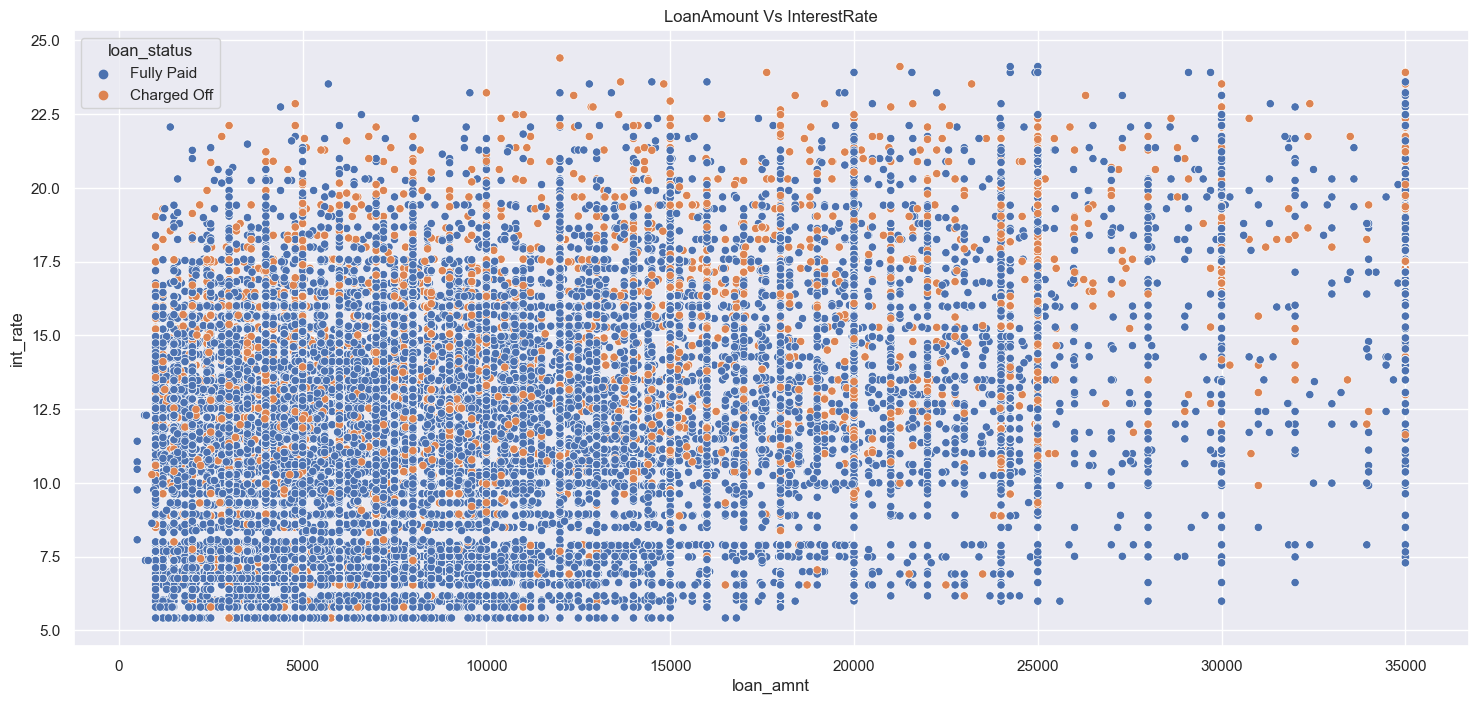

In [194]:
#create a scatter plot to determine the relation pattern
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data, hue='loan_status')
plt.title('LoanAmount Vs InterestRate')
plt.show()

**Observations:**
1. `Distribution is pretty much even so, no insights can be derived.`

In [195]:
!python --version

Python 3.11.3


## Summary/Conclusion

Below mentioned variables are considered as good discriminators:
1. Interest Rate (int_rate)
2. Annual Income (annual_inc)
3. Loan Amount (loan_amnt)
4. Term (term)
5. Revolving Line (revol_util)


**Major Observations**
1. High chance of 'default' if 'annual_inc' is in 60K-80K category 
2. Strong correlation is visible between 'installment','loan_amnt','funded_amnt'
3. The 'emp_length' and 'annual_inc' are positively correlated. As the employee experience increases, chances of default also increases. Highest is with employee in 10+ yrs.
4. With higher interest rate, its observed the 'Charged Off' loans are also higher for both 36 and 60 month term.
5. The 'annual_inc' is negatively correlated with 'dti' which implies that 'dti' is LOW when 'annual_inc' id HIGH.
6. The average interest rates for the Charged Off records are in the range of 11 to 17.
